# E-Commerce Customer Satisfaction Prediction

E-commerce is the platform where sellers can sell products and customers can buy them. For this case study, we have taken the dataset given by Olist, which is an e-commerce platform in Brazil. Olist wants to improve the business as well as provide better service to customers by using the customer satisfaction information.

In the present system, customers give ratings out of 5, and also can write comments/reviews about the product that he/she has purchased. Using these, e-commerce platforms will rate the products, which helps other people to get insights about the quality of the product. According to the seller, these reviews will play a crucial role to improve the business. But many times, customers would not give any ratings or reviews. Predicting the review score by customers is the main problem in e-commerce business.

The machine learning regression models are used for predicting customer satisfaction. Since the data has a binary target variable, we are planning to perform a Binary Classification model; and our goal is to predict whether the customer is satisfied or not based on the same.

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Data is divided into multiple datasets(7 csv files) for better understanding and organization:
    
1) olist_orders_dataset: 
This is connected to 4 other tables. It is used to connect all the details related to an order

2) olist_order_items_dataset: 
Contains the item details of purchases such as shipping date, price and so on

3) olist_order_reviews_dataset: 
Contains the details related to reviews posted by the customer if any, on products he had purchased

4) olist_products_dataset: 
Contains details related to a product such as the product ID, category name and measurements

5) olist_order_payments_dataset: 
Contains the details related to payment details associated with a particular order

6) olist_customers_dataset: 
Contains details of the customers who made the purchases

7) olist_sellers_dataset: 
Contains the information related to all the sellers

# Data Description

Features of all csv files are described below:

1. olist_orders_dataset.csv features:

order_id: A unique id of order made by the consumers

customer_id: Id of the consumer who made the purchase

order_status: Status of the order made i.e delivered, shipped etc

order_purchase_timestamp: Timestamp of the purchase

order_approved_at: Timestamp of the order approval

order_delivered_carrier_date: Delivery date at which carrier made the delivery

order_delivered_customer_date: Date at which customer got the product

order_estimated_delivery_date: Estimated delivery date of the products

2. olist_order_items_dataset.csv features:

order_id: A unique id of order made by the consumers
    
order_item_id: A Unique id given to each item ordered in the order
    
product_id: A unique id given to each product available on the site
    
seller_id: Unique Id of the seller registered in olist
    
shipping_limit_date: The date before which shipping of the ordered product must be completed
    
price: Actual price of the products ordered
    
freight_value: Price rate at which a product is delivered from one point to another

3. olist_order_reviews_dataset.csv features:

review_id: Id of the review given on the product ordered by the order id
    
order_id: A unique id of order made by the consumers
    
review_score: Review score given by the customer for each order on the scale of 1–5
    
review_comment_title: Title of the review
    
review_comment_message: Review comments posted by the consumer for each order
    
review_creation_date: Timestamp of the review when it is created
    
review_answer_timestamp: Timestamp of the review answered

4. olist_products_dataset features:

product_id: A unique identifier for the proposed project
    
product_category_name: Name of the product category
    
product_name_lenght: Length of the string which specify the name given to the products ordered
    
product_description_lenght: Length of the description written for each product ordered on the site
    
product_photos_qty: Number of photos of each product ordered available on the shopping portal
    
product_weight_g: Weight of the products ordered in grams
    
product_length_cm: Length of the products ordered in centimeters
    
product_height_cm: Height of the products ordered in centimeters
    
product_width_cm: Width of the product ordered in centimeters

5. olist_order_payments_dataset features:

order_id: A unique id of order made by the consumers
    
payment_sequential: Sequences of the payments made in case of EMI
    
payment_type: Mode of payment used.(Ex-Credit Card)
    
payment_installments: Number of installments in case of EMI purchase
    
payment_value: Total amount paid for the purshase order

6. olist_customers_dataset.csv features:

customer_id: Id of the consumer who made the purchase
    
customer_unique_id: Unique Id of the consumer
    
customer_zip_code_prefix: Zip Code of the location of the consumer
    
customer_city: Name of the City from where order is made
    
customer_state:State Code from where order is made(Ex- sao paulo-SP)

7. olist_sellers_dataset.csv features:

seller_id: Unique Id of the seller registered in olist
    
seller_zip_code_prefix: Zip Code of the location of the seller
    
seller_city: Name of the City of the seller
    
seller_state: State Code (Ex- sao paulo-SP)

# Reading all datasets

In [2]:
customers=pd.read_csv('olist_customers_dataset.csv')
customers.shape

(99441, 5)

In [3]:
order_items =pd.read_csv('olist_order_items_dataset.csv')
order_items.shape

(112650, 7)

In [4]:
order_payments=pd.read_csv('olist_order_payments_dataset.csv')
order_payments.shape

(103886, 5)

In [5]:
order_review=pd.read_csv('olist_order_reviews_dataset.csv')
order_review.shape

(99224, 7)

In [6]:
orders=pd.read_csv('olist_orders_dataset.csv')
orders.shape

(99441, 8)

In [7]:
products=pd.read_csv('olist_products_dataset.csv')
products.shape

(32951, 9)

In [8]:
sellers=pd.read_csv('olist_sellers_dataset.csv')
sellers.shape

(3095, 4)

We need to merge these files to get the whole dataset.

We have merged the dataset based on the Data Schema available for these datasets.

In [9]:
#merging datasets

In [10]:
#merging order_items and products
df1=pd.merge(order_items,products,on='product_id')
df1.shape

(112650, 15)

In [11]:
#merging df1 and sellers
df2=pd.merge(df1,sellers,on='seller_id')
df2.shape

(112650, 18)

In [12]:
#merging df2 and orders 
df3=pd.merge(df2,orders,on='order_id')
df3.shape

(112650, 25)

In [13]:
#merging df3 and order_payments
df4=pd.merge(df3,order_payments,on='order_id')
df4.shape

(117601, 29)

In [14]:
#merging df4 and customers 
df5=pd.merge(df4,customers,on='customer_id')
df5.shape

(117601, 33)

In [15]:
#merging df5 and order_review
df6=pd.merge(df5,order_review,on='order_id')
df6.shape

(117329, 39)

In [16]:
df=df6

In [17]:
#df.to_csv('merged.csv',index=False)

In [18]:
#final dataset
pd.set_option('display.max_columns',None)
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,3ce436f183e68e07877b285a838db11a,delivered,9/13/2017 8:59,9/13/2017 9:45,9/19/2017 18:34,9/20/2017 23:43,9/29/2017 0:00,1,credit_card,2,72.19,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",9/21/2017 0:00,9/22/2017 10:57
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,7/5/2017 2:44,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,e6eecc5a77de221464d1c4eaff0a9b64,delivered,6/28/2017 11:52,6/29/2017 2:44,7/5/2017 12:00,7/13/2017 20:39,7/26/2017 0:00,1,boleto,1,73.86,0fb8e3eab2d3e79d92bb3fffbb97f188,75800,jatai,GO,b11cba360bbe71410c291b764753d37f,5,NaN,"lannister como sempre, entregou certinho e den...",7/14/2017 0:00,7/17/2017 12:50
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,5/23/2018 10:56,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,4ef55bf80f711b372afebcb7c715344a,delivered,5/18/2018 10:25,5/18/2018 12:31,5/23/2018 14:05,6/4/2018 18:34,6/7/2018 0:00,1,credit_card,2,83.23,3419052c8c6b45daf79c1e426f9e9bcb,30720,belo horizonte,MG,af01c4017c5ab46df6cc810e069e654a,4,super recomendo,carrinho muito bonito,6/5/2018 0:00,6/6/2018 21:41
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,8/7/2017 18:55,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,30407a72ad8b3f4df4d15369126b20c9,delivered,8/1/2017 18:38,8/1/2017 18:55,8/2/2017 19:07,8/9/2017 21:26,8/25/2017 0:00,1,credit_card,3,75.07,e7c828d22c0682c1565252deefbe334d,83070,sao jose dos pinhais,PR,8304ff37d8b16b57086fa283fe0c44f8,5,NaN,NaN,8/10/2017 0:00,8/13/2017 3:35
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,8/16/2017 22:05,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,91a792fef70ecd8cc69d3c7feb3d12da,delivered,8/10/2017 21:48,8/10/2017 22:05,8/11/2017 19:43,8/24/2017 20:04,9/1/2017 0:00,1,credit_card,4,72.19,0bb98ba72dcc08e95f9d8cc434e9a2cc,36400,conselheiro lafaiete,MG,426f43a82185969503fb3c86241a9535,5,NaN,NaN,8/25/2017 0:00,8/28/2017 0:51


In [19]:
df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

As the following features are unique values, and could not find a pattern in it we can drop the same:

order_id, order_item_id, product_id,seller_id,seller_zip_code_prefix,customer_id,customer_unique_id,customer_zip_code_prefix,review_id 

In [20]:
df=df.drop(['order_id', 'order_item_id', 'product_id','seller_id','seller_zip_code_prefix','customer_id','customer_unique_id','customer_zip_code_prefix','review_id'],axis=1)

As we are predicting the customer satisfaction based on the review_score, we need to only consider the information till the delivery of the product. 

Also review_comment_title and review_comment_message contains more null values and we can't impute these values, we are droping the features:

review_comment_title             
review_comment_message           
review_creation_date                 
review_answer_timestamp 

In [21]:
df=df.drop(['review_comment_title',             
'review_comment_message',           
'review_creation_date',                 
'review_answer_timestamp'],axis=1)

In [22]:
df.shape

(117329, 26)

In [23]:
#finding duplicate rows
df.duplicated().sum()

10938

In [24]:
#removing duplicate rows keeping first
df=df.drop_duplicates(keep='first')
df.shape

(106391, 26)

In [25]:
#The Shape of final dataset is 
df.shape

(106391, 26)

In [26]:
df.head()

,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_city,customer_state,review_score
0,9/19/2017 9:45,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,volta redonda,SP,delivered,9/13/2017 8:59,9/13/2017 9:45,9/19/2017 18:34,9/20/2017 23:43,9/29/2017 0:00,1,credit_card,2,72.19,campos dos goytacazes,RJ,5
1,7/5/2017 2:44,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,volta redonda,SP,delivered,6/28/2017 11:52,6/29/2017 2:44,7/5/2017 12:00,7/13/2017 20:39,7/26/2017 0:00,1,boleto,1,73.86,jatai,GO,5
2,5/23/2018 10:56,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,volta redonda,SP,delivered,5/18/2018 10:25,5/18/2018 12:31,5/23/2018 14:05,6/4/2018 18:34,6/7/2018 0:00,1,credit_card,2,83.23,belo horizonte,MG,4
3,8/7/2017 18:55,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,volta redonda,SP,delivered,8/1/2017 18:38,8/1/2017 18:55,8/2/2017 19:07,8/9/2017 21:26,8/25/2017 0:00,1,credit_card,3,75.07,sao jose dos pinhais,PR,5
4,8/16/2017 22:05,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,volta redonda,SP,delivered,8/10/2017 21:48,8/10/2017 22:05,8/11/2017 19:43,8/24/2017 20:04,9/1/2017 0:00,1,credit_card,4,72.19,conselheiro lafaiete,MG,5


# EDA

In [27]:
df.columns

Index(['shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_city', 'seller_state', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_city',
       'customer_state', 'review_score'],
      dtype='object')

In [28]:
#display summary statistics for a dataframe
df.describe()

,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,review_score
count,106391.000000,106391.000000,104848.000000,104848.000000,104848.000000,106373.000000,106373.000000,106373.000000,106373.000000,106391.000000,106391.000000,106391.000000,106391.000000
mean,124.297151,20.156566,48.871843,785.877413,2.237830,2109.283869,30.187745,16.438965,23.105939,1.094369,2.893891,156.995357,4.073023
std,188.348959,15.931210,10.001377,651.434420,1.741043,3786.734623,16.136477,13.330634,11.780207,0.721109,2.722641,217.400749,1.355628
min,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1.000000
25%,40.000000,13.150000,42.000000,347.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,57.680000,4.000000
50%,78.000000,16.350000,52.000000,601.000000,2.000000,700.000000,25.000000,13.000000,20.000000,1.000000,1.000000,102.130000,5.000000
75%,139.000000,21.250000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,175.940000,5.000000
max,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,29.000000,24.000000,13664.080000,5.000000


In [29]:
#check null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106391 entries, 0 to 117327
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   shipping_limit_date            106391 non-null  object 
 1   price                          106391 non-null  float64
 2   freight_value                  106391 non-null  float64
 3   product_category_name          104848 non-null  object 
 4   product_name_lenght            104848 non-null  float64
 5   product_description_lenght     104848 non-null  float64
 6   product_photos_qty             104848 non-null  float64
 7   product_weight_g               106373 non-null  float64
 8   product_length_cm              106373 non-null  float64
 9   product_height_cm              106373 non-null  float64
 10  product_width_cm               106373 non-null  float64
 11  seller_city                    106391 non-null  object 
 12  seller_state                  

In [30]:
#define numerical and categorical columns
categorical_features=[feature for feature in df.columns if df[feature].dtype =='O']
print(' we have {} categorical_features '.format (len(categorical_features)))
print('categorical_features are : ',categorical_features)

 we have 13 categorical_features 
categorical_features are :  ['shipping_limit_date', 'product_category_name', 'seller_city', 'seller_state', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'payment_type', 'customer_city', 'customer_state']


In [31]:
neumeric_features=list(df.select_dtypes(include=np.number))
print(' we have {} numeric_features '.format (len(neumeric_features)))
print(' numeric_features are : {} '.format( neumeric_features ))

 we have 13 numeric_features 
 numeric_features are : ['price', 'freight_value', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'payment_sequential', 'payment_installments', 'payment_value', 'review_score'] 


In [32]:
#as date time data is listed as categorical features
#converting in to datetime for further analysis
Date=['shipping_limit_date', 'order_purchase_timestamp','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','order_approved_at']
for i in Date:
    df[i]=pd.to_datetime(df[i])

As it is not possible to impute datetime data, we are removing those rows which contain null values in any of the datetime columns. Hence, we have to drop it for further analysis.

In [33]:
#droping null values in day time column
df=df.dropna(subset='order_approved_at')
df=df.dropna(subset='order_delivered_carrier_date')
df=df.dropna(subset='order_delivered_customer_date')

In [34]:
#checking null values
df.isnull().sum()

shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1480
product_name_lenght              1480
product_description_lenght       1480
product_photos_qty               1480
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
seller_city                         0
seller_state                        0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_city                       0
customer_state                      0
review_score                        0
dtype: int64

In [35]:
#checking whether date time feature is converted or not
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104127 entries, 0 to 117327
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   shipping_limit_date            104127 non-null  datetime64[ns]
 1   price                          104127 non-null  float64       
 2   freight_value                  104127 non-null  float64       
 3   product_category_name          102647 non-null  object        
 4   product_name_lenght            102647 non-null  float64       
 5   product_description_lenght     102647 non-null  float64       
 6   product_photos_qty             102647 non-null  float64       
 7   product_weight_g               104109 non-null  float64       
 8   product_length_cm              104109 non-null  float64       
 9   product_height_cm              104109 non-null  float64       
 10  product_width_cm               104109 non-null  float64       
 11  

# Univariate Analysis

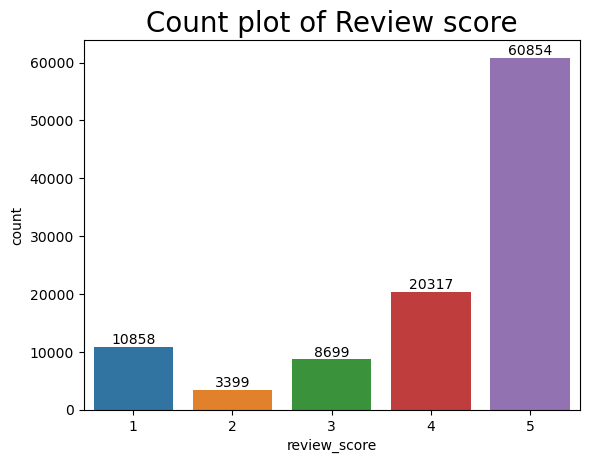

In [36]:
#Analysing target column
review=sns.countplot(data=df,x='review_score')
plt.title("Count plot of Review score",fontsize=20)
for i in review.containers:
    review.bar_label(i)

Target column has 5 classes.Number of instances with review score 4,5 is very high.and 1,2,3 is very low. Review score is our target column, and could see that the no. of satisfied customers are far more than the dissatisfied ones.

Review score above 3 = Satisfied customers

Review score 3 and below = Dissatified customers

From the graph we can clearly see that data is imbalanced.

In [37]:
# Analysing numerical columns
#cols = df[['price','freight_value','payment_sequential','payment_installments','payment_value']]
cols=df[['price','freight_value','product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','payment_value','payment_installments','product_width_cm']]

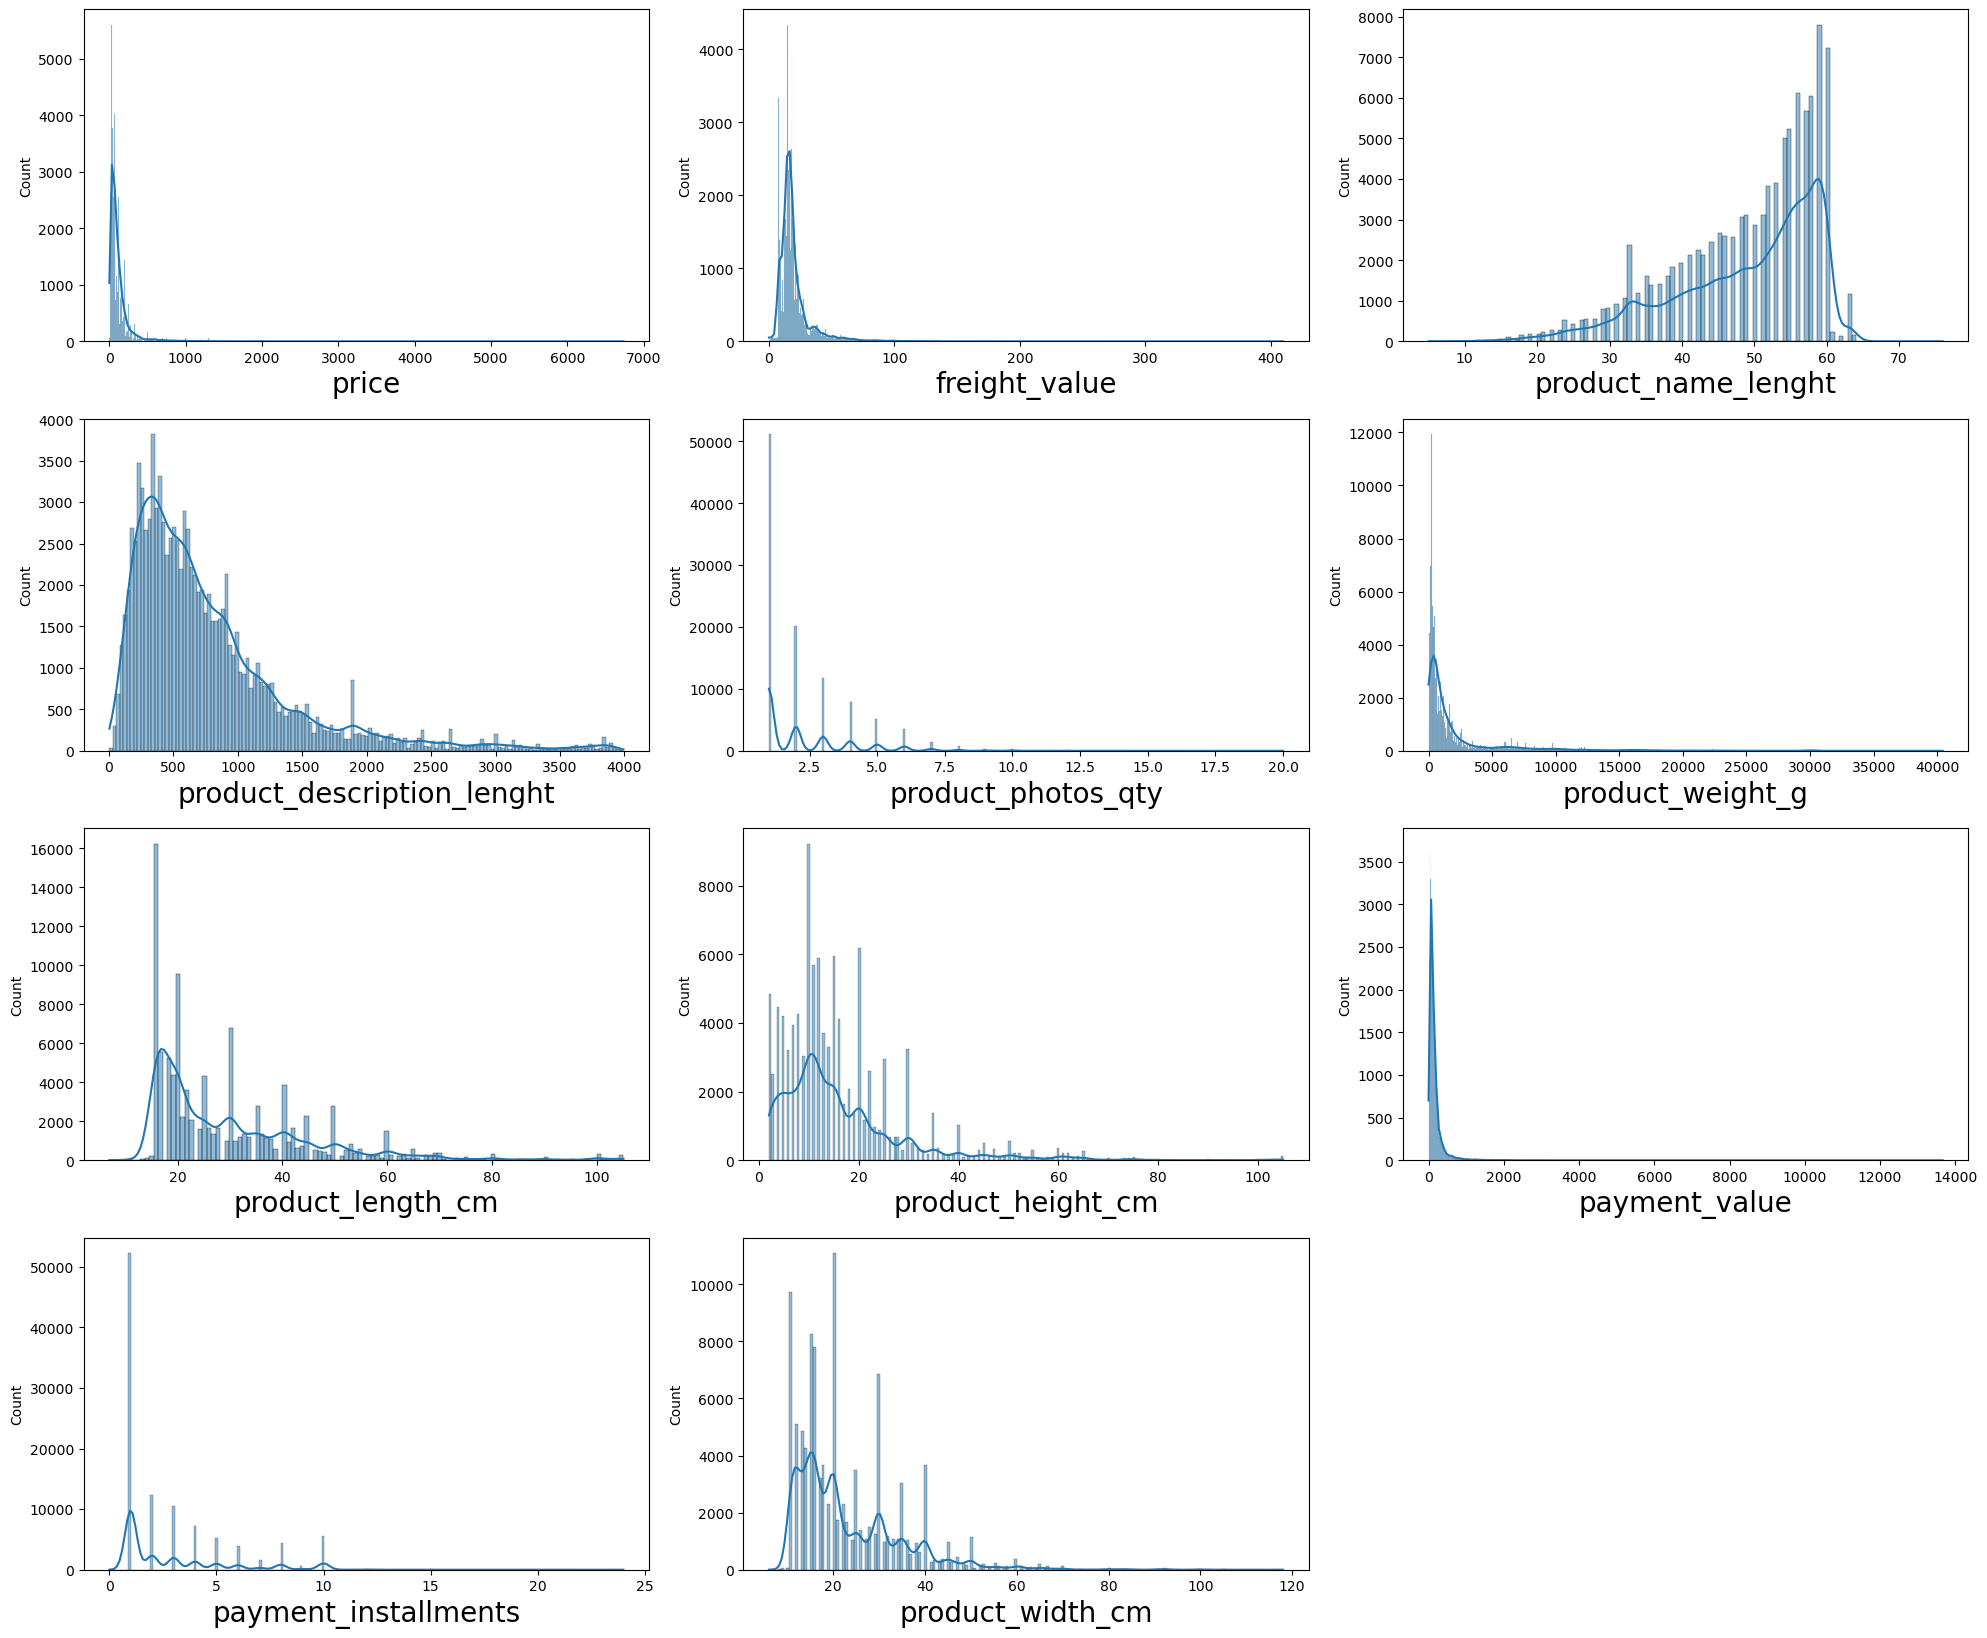

In [38]:
plt.figure(figsize=(20,20))
plotnumber =1
for column in cols:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.histplot(cols[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Observation:

we can understand the distribution of values for single variable.As we can see skewness in these plots, there will be outliers in collected data

### Top 10 popular categories

In [39]:
top_10_category = df["product_category_name"].value_counts().head(10)

print('Top 10 frequently repeated categories')
print('--------------------------------------')
print(top_10_category.reset_index().rename(columns={'index':'product_category',
                                              'product_category_name':'counts'}))

Top 10 frequently repeated categories
--------------------------------------
         product_category  counts
0         cama_mesa_banho   10595
1            beleza_saude    9048
2           esporte_lazer    7909
3        moveis_decoracao    6945
4  informatica_acessorios    6941
5   utilidades_domesticas    6196
6      relogios_presentes    5834
7               telefonia    4316
8              automotivo    4021
9              brinquedos    4014


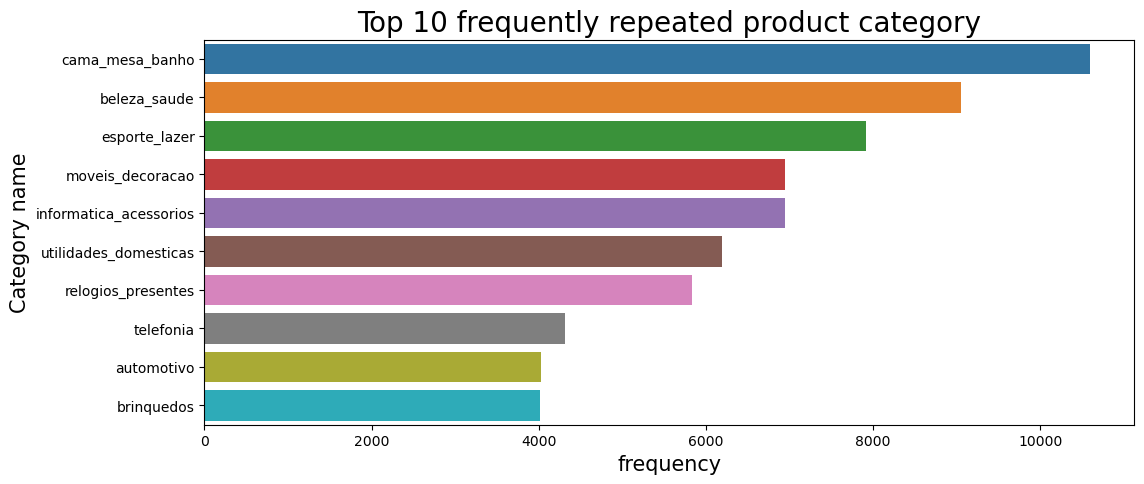

In [40]:
fig=plt.figure(figsize=(12,5))
sns.barplot(y=top_10_category.index, x=top_10_category.values)
plt.title('Top 10 frequently repeated product category',fontsize=20);
plt.xlabel('frequency',fontsize=15);
plt.ylabel('Category name',fontsize=15);


### Top 5 seller and customer city

In [41]:
top_5_seller_city = df["seller_city"].value_counts(ascending=False).head(5)
top_5_seller_city

sao paulo         25609
ibitinga           7435
curitiba           2828
santo andre        2797
belo horizonte     2446
Name: seller_city, dtype: int64

In [42]:
top_5_customer_city = df['customer_city'].value_counts(ascending=False).head(5)
top_5_customer_city

sao paulo         16343
rio de janeiro     7098
belo horizonte     2890
brasilia           2213
curitiba           1589
Name: customer_city, dtype: int64

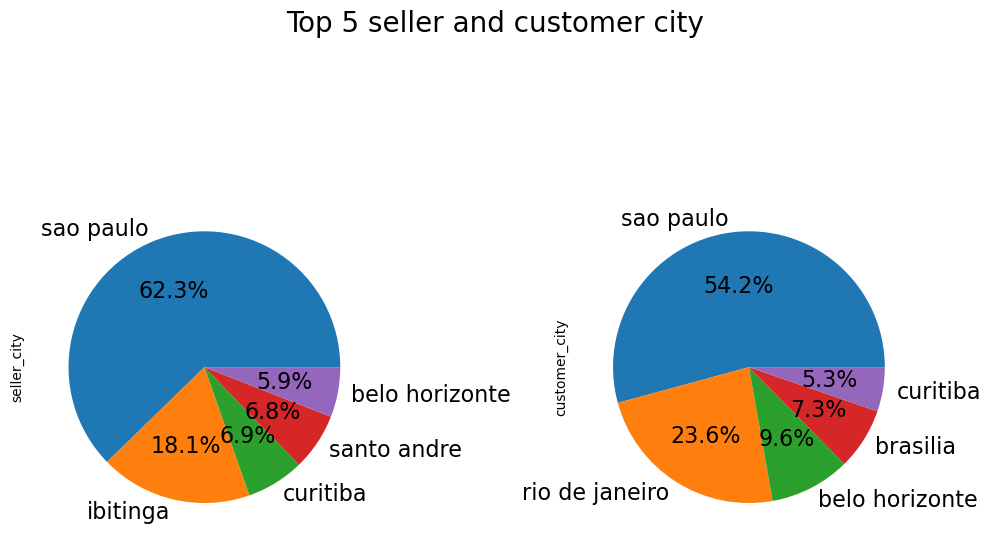

In [43]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,7))
plt.suptitle('Top 5 seller and customer city',fontsize=20);
df["seller_city"].value_counts().head().plot(ax=ax1,
    kind="pie",
    autopct="%1.1f%%",
    fontsize=16)
df["customer_city"].value_counts().head().plot(ax=ax2,
    kind="pie",
    autopct="%1.1f%%",
    fontsize=16)
plt.tight_layout()

Most of the orders are made from Sao Paulo and most of the sellers are also in Sao Paulo

### Top 5 seller and customer state

In [44]:
#Analysing seller_state and customer_state
top_5_seller_state = df["seller_state"].value_counts(ascending=False).head(5)
top_5_seller_state

SP    74034
MG     8288
PR     7964
RJ     4423
SC     3836
Name: seller_state, dtype: int64

In [45]:
top_5_customer_state = df["customer_state"].value_counts(ascending=False).head(5)
top_5_customer_state

SP    43869
RJ    13388
MG    12190
RS     5771
PR     5276
Name: customer_state, dtype: int64

<AxesSubplot:ylabel='customer_state'>

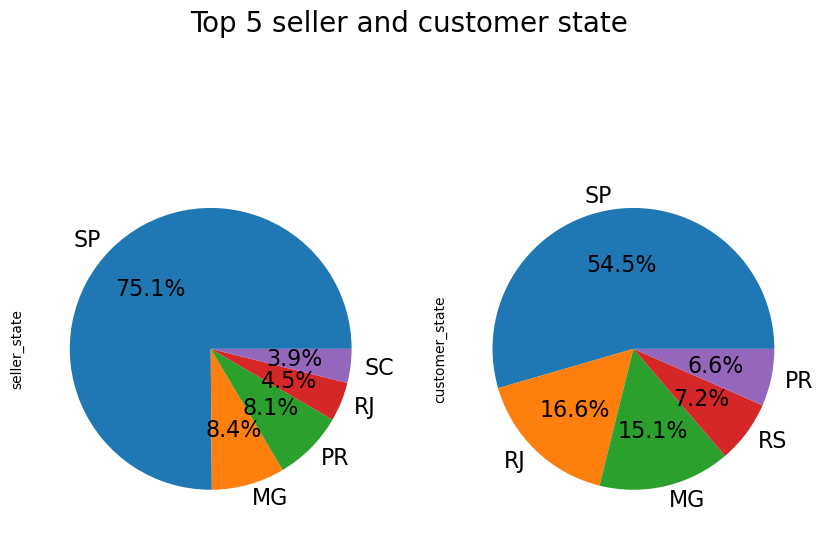

In [46]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,7))
plt.suptitle('Top 5 seller and customer state',fontsize=20);
df["seller_state"].value_counts().head().plot(ax=ax1,
    kind="pie",
    autopct="%1.1f%%",
    fontsize=16)

df["customer_state"].value_counts().head().plot(ax=ax2,
    kind="pie",
    autopct="%1.1f%%",
    fontsize=16)

Most of the sellers and customers are from SP (Sao Paulo)

### Orders are delivered or not

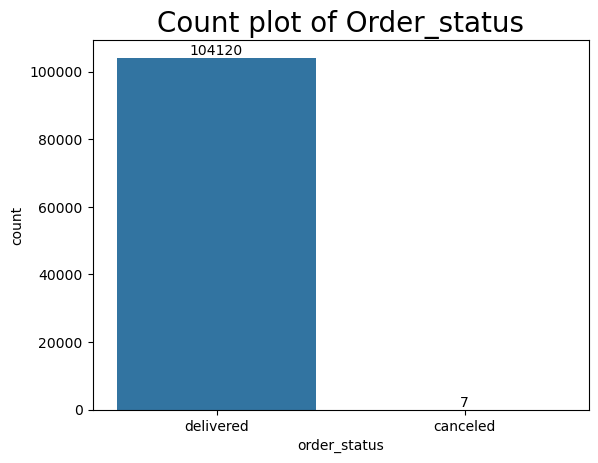

In [47]:
#analysing order status column
status=sns.countplot(x='order_status',data=df)
plt.title("Count plot of Order_status",fontsize=20)
for i in status.containers:
    status.bar_label(i)

When analysing order status most of the orders are delivered, only 7 orders are cancelled.

(array([0, 1, 2]),
 [Text(0, 0, '2016'), Text(1, 0, '2017'), Text(2, 0, '2018')])

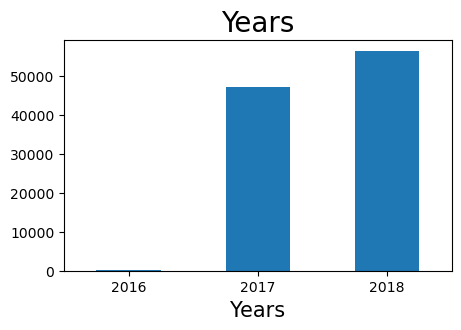

In [48]:
df['Year']= df['order_purchase_timestamp'].dt.year
df.groupby('Year').size().plot(kind='bar',figsize=(5,3));
plt.title('Years',fontsize=20);
plt.xlabel('Years',fontsize=15);
plt.xticks(rotation=0)

There is a huge jump from 2016 to 2017. But the growth from 2017 to 2018 is quite steady

### online shopping on weekdays or weekends

In [49]:
import calendar

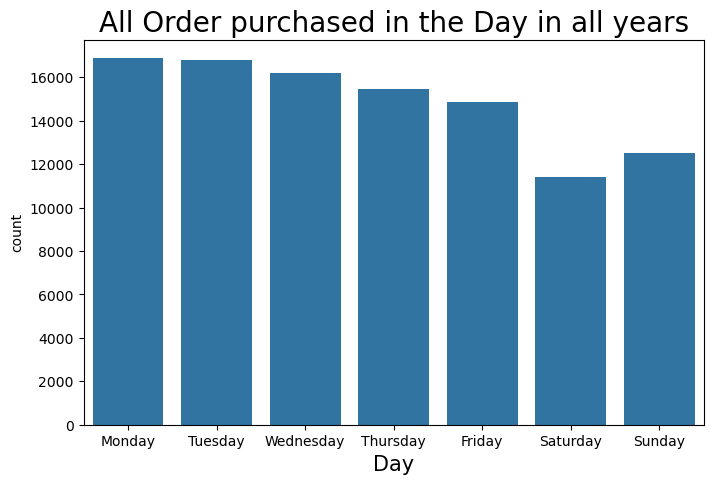

In [50]:
df['Day'] = df['order_purchase_timestamp'].dt.day_name()
#x=order
plt.figure(figsize=(8,5))
basecolor=sns.color_palette()[0]
sns.countplot(data=df,x='Day',order=list(calendar.day_name),color=basecolor);

plt.title('All Order purchased in the Day in all years', fontsize=20);
plt.xlabel('Day',fontsize=15);

We can see more online shopping happen on weekdays and less on weekends.

# Bivariate analysis

### Top 10 categories with highest average price.

In [51]:
average_price = df.groupby("product_category_name")["price"].agg(np.mean).sort_values().tail(10)

print('Top 10 categories with highest average price.')
print('-----------------------------------------------')
print(average_price.sort_values(ascending=False))

Top 10 categories with highest average price.
-----------------------------------------------
product_category_name
pcs                                              1118.729842
portateis_casa_forno_e_cafe                       641.194133
eletrodomesticos_2                                458.819687
agro_industria_e_comercio                         335.786425
instrumentos_musicais                             302.013638
portateis_cozinha_e_preparadores_de_alimentos     301.238462
eletroportateis                                   295.009107
construcao_ferramentas_seguranca                  222.841472
relogios_presentes                                203.940075
climatizacao                                      181.449757
Name: price, dtype: float64


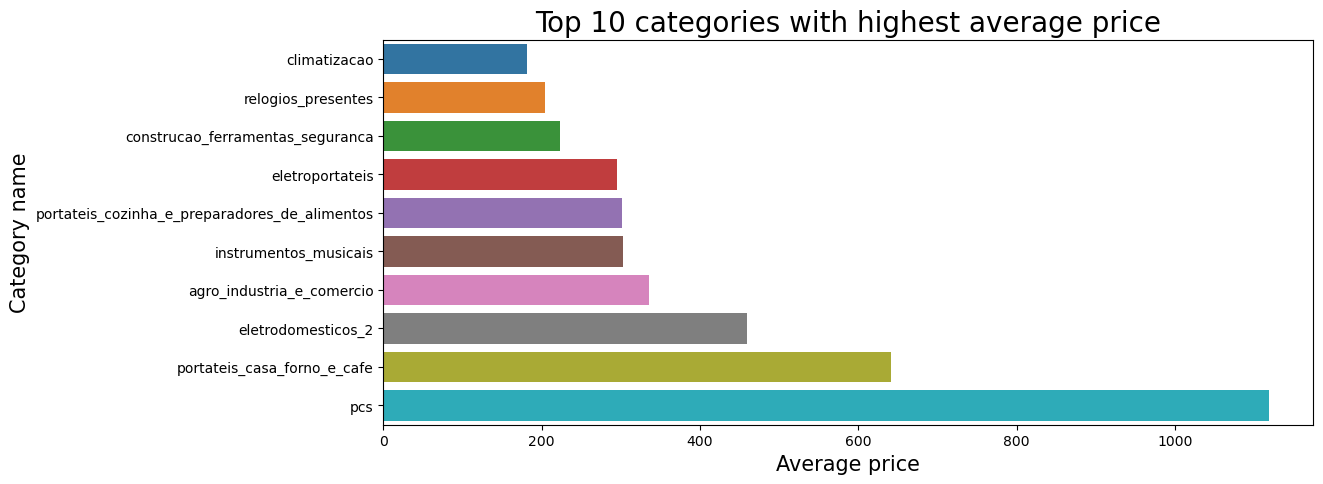

In [52]:
fig=plt.figure(figsize=(12,5))
sns.barplot(y=average_price.index, x=average_price.values)
plt.title('Top 10 categories with highest average price',fontsize=20);
plt.xlabel('Average price',fontsize=15);
plt.ylabel('Category name',fontsize=15);

### Mostly used Payment modes

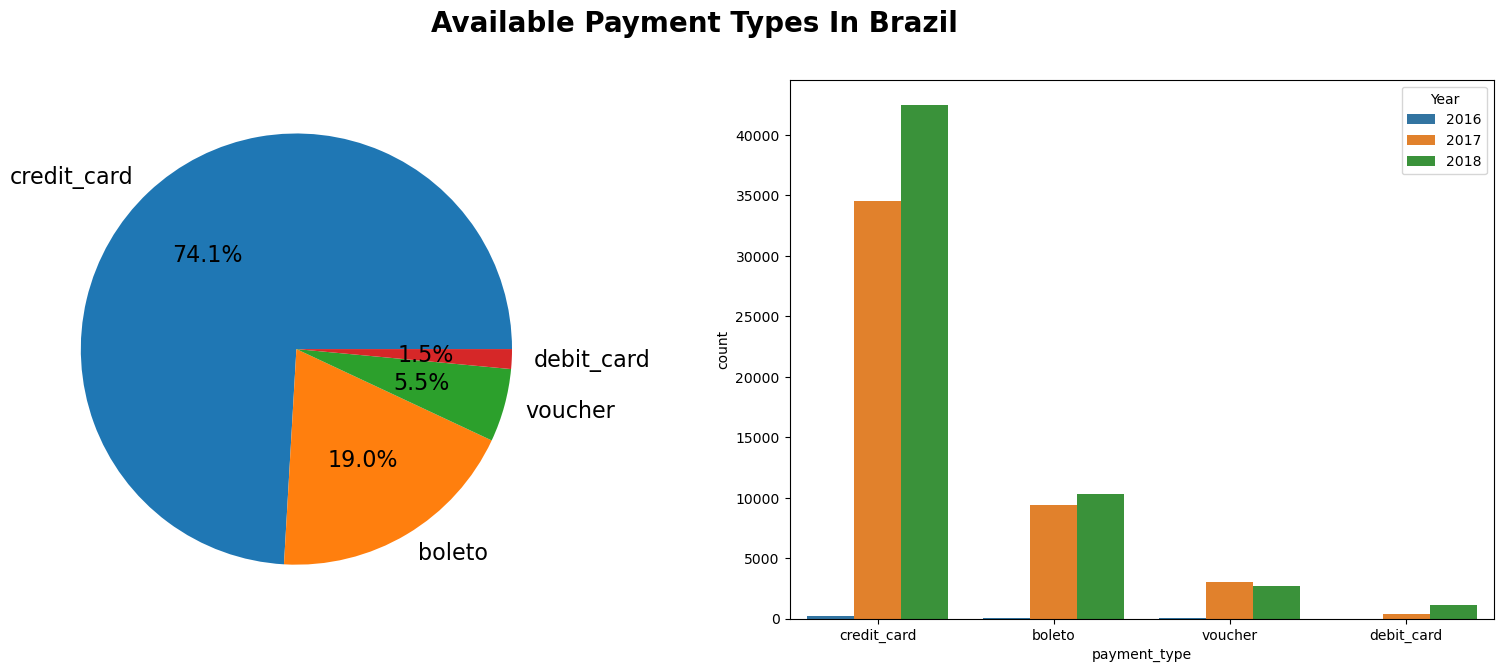

In [53]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,7))
plt.suptitle('Available Payment Types in Brazil'.title() , fontsize=20,fontweight='bold');

df["payment_type"].value_counts().plot(kind="pie",autopct="%1.1f%%",ax=ax1,fontsize=16)
ax1.axis('off');
sns.countplot(data=df,x='payment_type',hue='Year',ax=ax2);


74% people use credit card for the payment for the purchase. Most common payment method is credit card,followed by boleto and both show trending up over years

### Is payment type depends on review score

Text(0.5, 1.0, 'Review Score vs Payment Types')

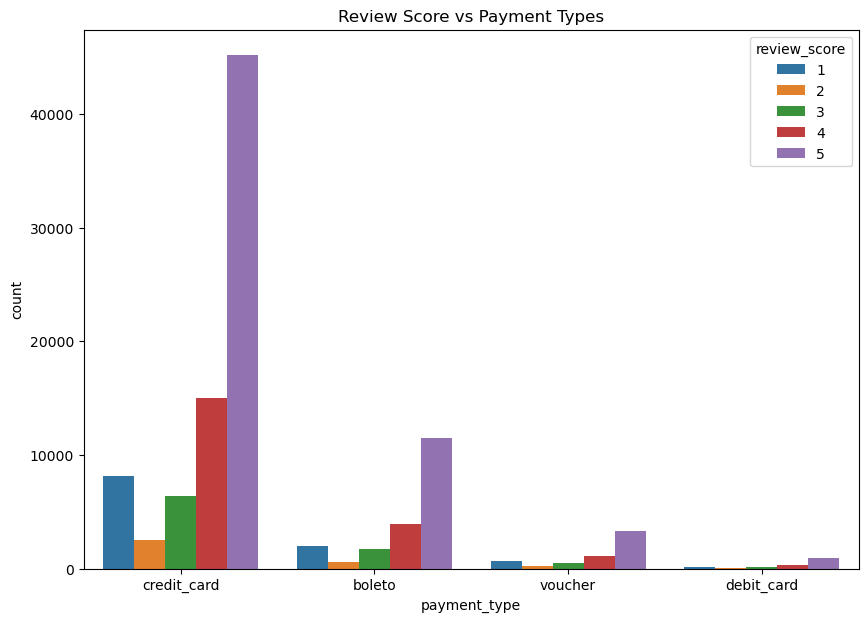

In [54]:
# Payment Type with Review Score
plt.figure(figsize=(10,7))
sns.countplot(data=df,x='payment_type',hue='review_score')
plt.title("Review Score vs Payment Types")

We couldn't see any significant differences between Review Scores and Payment types

### Relation between seller state and Review score

Text(0.5, 1.0, 'Review Score vs Seller State')

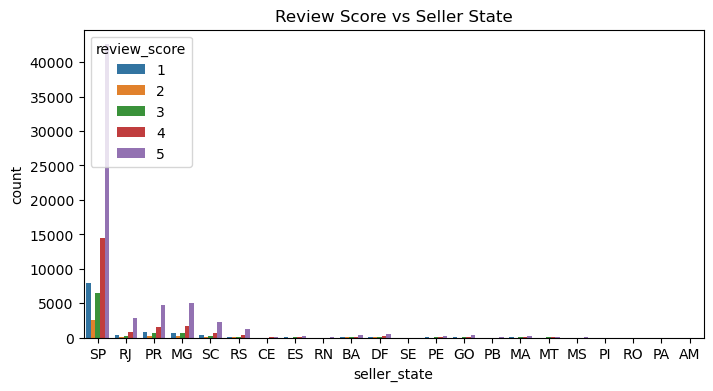

In [55]:
# Seller Sate with Review Score
plt.figure(figsize=(8,4))
sns.countplot(data=df,x='seller_state',hue='review_score')
plt.title("Review Score vs Seller State")

SP has more number of sellers and SP has more % share of sellers in all the review score

### Relation between Customer State and Review score

Text(0.5, 1.0, 'Review Score vs Customer State')

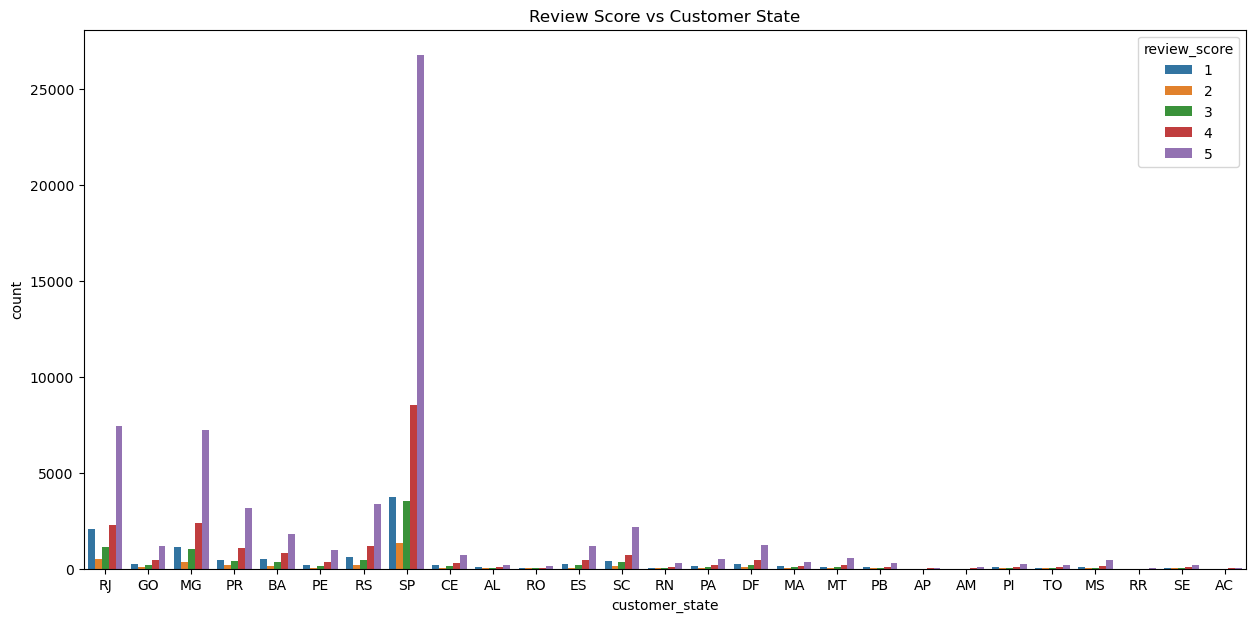

In [56]:
# Customer State with Review Score
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='customer_state',hue='review_score')
plt.title("Review Score vs Customer State")

SP has more number of customers and SP has more % share of customers in all the review score.

### Low price products cancelled most


<AxesSubplot:xlabel='price', ylabel='order_status'>

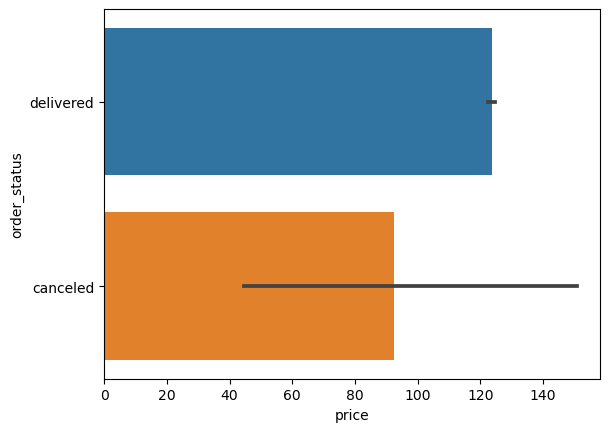

In [57]:
#Two columns (bi-variate): numeric and categorical:
#relation between price and order status
sns.barplot(x='price', y='order_status', data=df)

Products which are having lowest prices are cancelled the most

### High price products are paid using which paymentmode

<AxesSubplot:xlabel='price', ylabel='payment_type'>

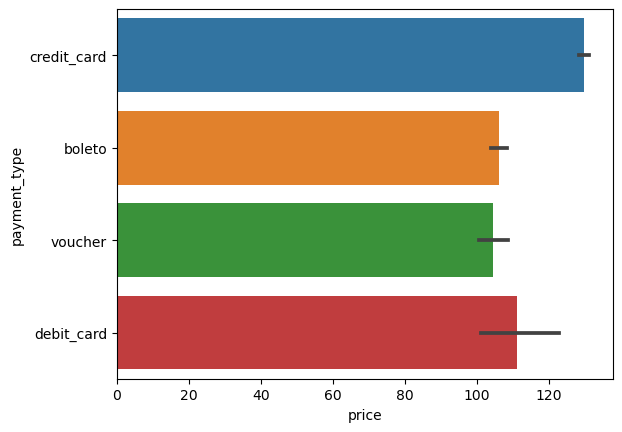

In [58]:
#relation between price and payment mode
sns.barplot(x='price', y='payment_type', data=df)

Products which are having the highest prices, the payments are done through credit cards

# Multivariate Analysis

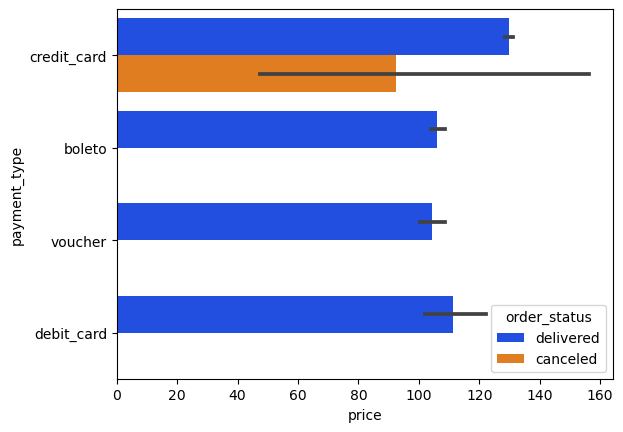

In [59]:
#Three columns (multivariate): two categorical and one numeric:
sns.barplot(x='price', y='payment_type', data=df, palette='bright', hue='order_status');

All the products which are cancelled, whose payments are done through credit cards

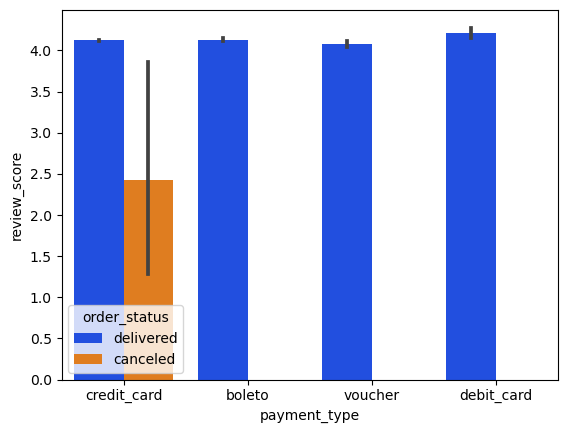

In [60]:
sns.barplot(x='payment_type', y='review_score', data=df, palette='bright', hue='order_status');

Review scores are independent from payment types, and we could see that the products cancelled are having low review scores

# Data Pre-processing

We aim to convert this problem in to a binary classification task; hence we are creating a new target column called ratings.

* Review score = 1,2,3 --> Unsatisfied(0) 
* Review score = 4,5   --> Satisfied(1)

In [61]:
# Using Lambda function to create a new target column
df['ratings']=df['review_score'].apply(lambda x:1 if x>3 else 0)
df=df.drop(['review_score'],axis=1)
df.head()

,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_city,customer_state,Year,Day,ratings
0,2017-09-19 09:45:00,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,volta redonda,SP,delivered,2017-09-13 08:59:00,2017-09-13 09:45:00,2017-09-19 18:34:00,2017-09-20 23:43:00,2017-09-29,1,credit_card,2,72.19,campos dos goytacazes,RJ,2017,Wednesday,1
1,2017-07-05 02:44:00,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,volta redonda,SP,delivered,2017-06-28 11:52:00,2017-06-29 02:44:00,2017-07-05 12:00:00,2017-07-13 20:39:00,2017-07-26,1,boleto,1,73.86,jatai,GO,2017,Wednesday,1
2,2018-05-23 10:56:00,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,volta redonda,SP,delivered,2018-05-18 10:25:00,2018-05-18 12:31:00,2018-05-23 14:05:00,2018-06-04 18:34:00,2018-06-07,1,credit_card,2,83.23,belo horizonte,MG,2018,Friday,1
3,2017-08-07 18:55:00,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,volta redonda,SP,delivered,2017-08-01 18:38:00,2017-08-01 18:55:00,2017-08-02 19:07:00,2017-08-09 21:26:00,2017-08-25,1,credit_card,3,75.07,sao jose dos pinhais,PR,2017,Tuesday,1
4,2017-08-16 22:05:00,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,volta redonda,SP,delivered,2017-08-10 21:48:00,2017-08-10 22:05:00,2017-08-11 19:43:00,2017-08-24 20:04:00,2017-09-01,1,credit_card,4,72.19,conselheiro lafaiete,MG,2017,Thursday,1


In [62]:
df['ratings'].value_counts(normalize=True)

1    0.779538
0    0.220462
Name: ratings, dtype: float64

# Handling missing values

In [63]:
df.isnull().sum()

shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1480
product_name_lenght              1480
product_description_lenght       1480
product_photos_qty               1480
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
seller_city                         0
seller_state                        0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_city                       0
customer_state                      0
Year                                0
Day         

In [64]:
percent_missing=df.isnull().sum()*100/len(df)
percent_missing

shipping_limit_date              0.000000
price                            0.000000
freight_value                    0.000000
product_category_name            1.421341
product_name_lenght              1.421341
product_description_lenght       1.421341
product_photos_qty               1.421341
product_weight_g                 0.017287
product_length_cm                0.017287
product_height_cm                0.017287
product_width_cm                 0.017287
seller_city                      0.000000
seller_state                     0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.000000
order_delivered_carrier_date     0.000000
order_delivered_customer_date    0.000000
order_estimated_delivery_date    0.000000
payment_sequential               0.000000
payment_type                     0.000000
payment_installments             0.000000
payment_value                    0.000000
customer_city                    0

In [65]:
# Handling missing values in product_category_name column
# The missing values in categorical data can be filled with "mode", so missing values in product category column is replaced by mode.
df['product_category_name']=df['product_category_name'].fillna(df['product_category_name'].mode()[0])

In [66]:
# Handling missing values in product_name_length
# Product_name_length column is left skewed, so we fill the null values using median
df['product_name_lenght']=df['product_name_lenght'].fillna(df['product_name_lenght'].median())

In [67]:
# Handling missing values in product_description_length
# Product_description_length is right skewed, so we fill the null values using median
df['product_description_lenght']=df['product_description_lenght'].fillna(df['product_description_lenght'].median())

In [68]:
# Handling missing values in product_photos_qty, product_weight,product_length,product_width
# Right skewed so null values filled with median
df['product_photos_qty']=df['product_photos_qty'].fillna(df['product_photos_qty'].median())
df['product_weight_g']=df['product_weight_g'].fillna(df['product_weight_g'].median())
df['product_length_cm']=df['product_length_cm'].fillna(df['product_length_cm'].median())
df['product_height_cm']=df['product_height_cm'].fillna(df['product_height_cm'].median())
df['product_width_cm']=df['product_width_cm'].fillna(df['product_width_cm'].median())

In [69]:
df.isnull().sum()

shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
seller_city                      0
seller_state                     0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_city                    0
customer_state                   0
Year                             0
Day                              0
ratings                          0
dtype: int64

# Handling outliers

In [70]:
outlier_cols=df[['price','freight_value','product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm','payment_installments','payment_value']]

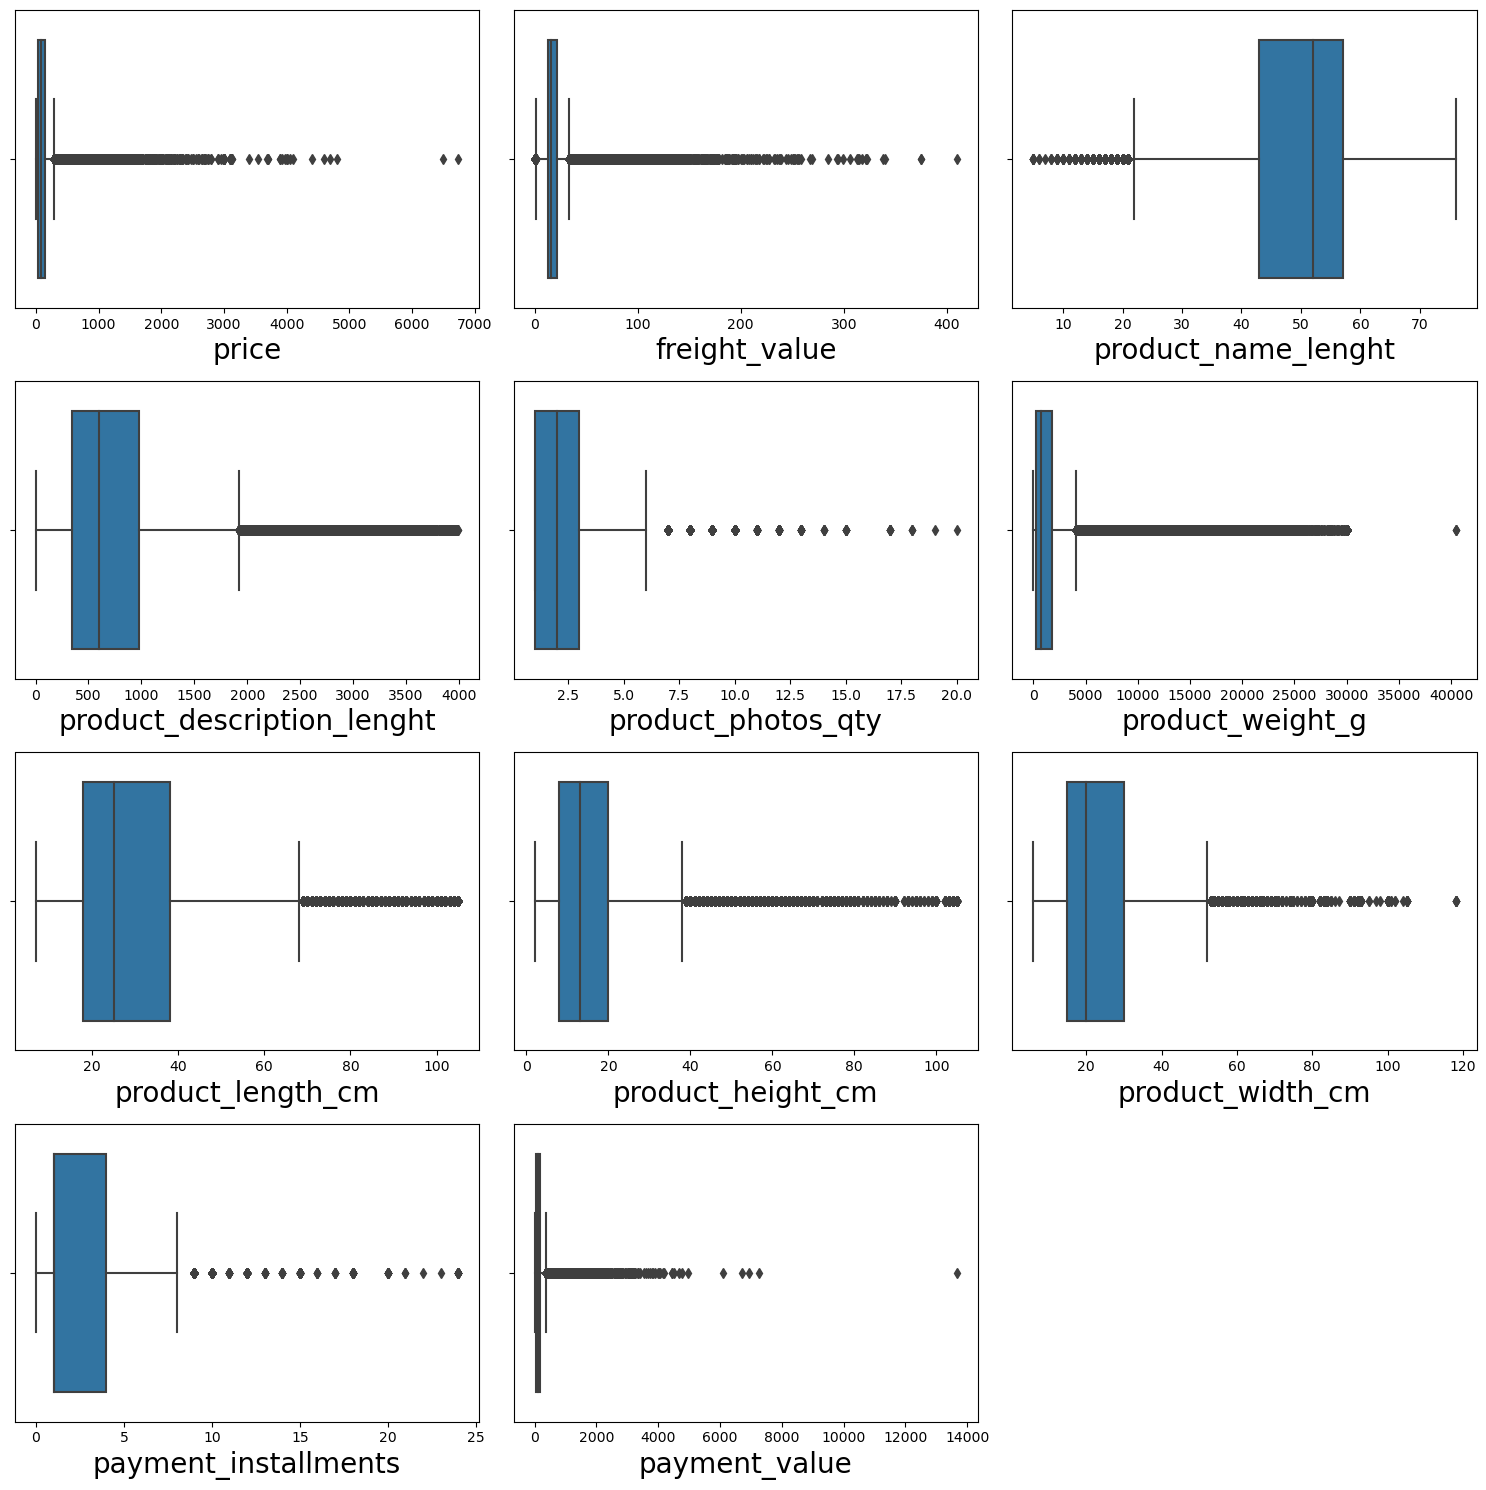

In [71]:
plt.figure(figsize=(15,15))
plotnumber =1
for column in outlier_cols:
    if plotnumber<=15:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(x=outlier_cols[column],data=df)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [72]:
# Detecting and handling outliers in price  
q1,q2,q3 = np.percentile(df['price'],[25,50,75])
print("q1,q2,q3 is :",q1,q2,q3)
IQR = q3-q1
print("IQR is :" ,IQR)
lower_limit = q1-(1.5*IQR)
upper_limit = q3+(1.5*IQR)
print("lower = " ,lower_limit)
print("upper = " ,upper_limit)
outlier = []
for i in df['price']:
    if ((i>upper_limit) or (i<lower_limit)):
        outlier.append(i)
print(len(outlier))

q1,q2,q3 is : 40.0 78.0 138.5
IQR is : 98.5
lower =  -107.75
upper =  286.25
7741


In [73]:
# Price may be genuine, so we perform log transformation
df['price']=np.log(df['price'])

<AxesSubplot:xlabel='price'>

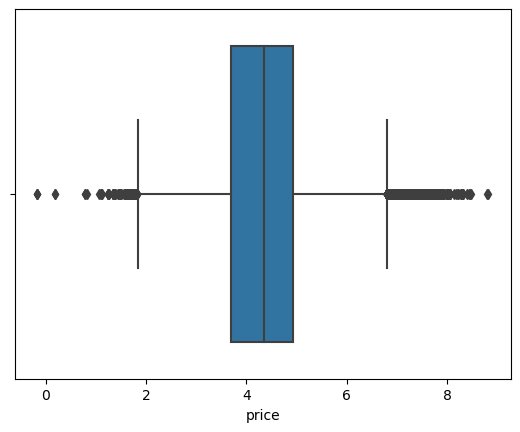

In [74]:
sns.boxplot(x='price',data=df)

In [75]:
# Detecting and handling outliers in price  
q1,q2,q3 = np.percentile(df['price'],[25,50,75])
print("q1,q2,q3 is :",q1,q2,q3)
IQR = q3-q1
print("IQR is :" ,IQR)
lower_limit = q1-(1.5*IQR)
upper_limit = q3+(1.5*IQR)
print("lower = " ,lower_limit)
print("upper = " ,upper_limit)
outlier = []
for i in df['price']:
    if ((i>upper_limit) or (i<lower_limit)):
        outlier.append(i)
print(len(outlier))

q1,q2,q3 is : 3.6888794541139363 4.356708826689592 4.930870325627393
IQR is : 1.2419908715134569
lower =  1.825893146843751
upper =  6.793856632897579
1262


In [76]:
df['price']=np.where(df['price']>upper_limit,upper_limit,df['price']) # Capping the upper limit
df['price']=np.where(df['price']<lower_limit,upper_limit,df['price']) # Flooring the lower limit

<AxesSubplot:xlabel='price'>

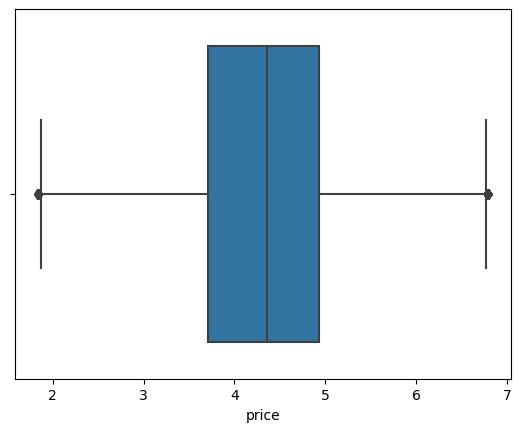

In [77]:
sns.boxplot(x='price',data=df)

In [78]:
# Detecting and handling outliers in freight_value 
q1,q2,q3 = np.percentile(df['freight_value'],[25,50,75])
print("q1,q2,q3 is :",q1,q2,q3)
IQR = q3-q1
print("IQR is :" ,IQR)
lower_limit = q1-(1.5*IQR)
upper_limit = q3+(1.5*IQR)
print("lower = " ,lower_limit)
print("upper = " ,upper_limit)
outlier = []
for i in df['freight_value']:
    if ((i>upper_limit) or (i<lower_limit)):
        outlier.append(i)
print(len(outlier))

q1,q2,q3 is : 13.14 16.34 21.22
IQR is : 8.079999999999998
lower =  1.0200000000000031
upper =  33.339999999999996
11287


In [79]:
# Freight value may be genuine, so we perform log transformation
df['freight_value']=np.log(df['freight_value'])

<AxesSubplot:xlabel='freight_value'>

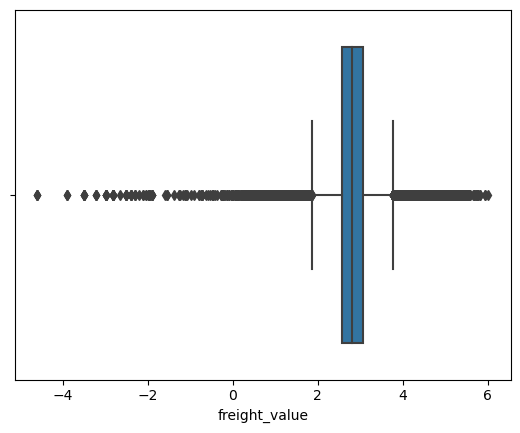

In [80]:
sns.boxplot(x='freight_value',data=df)

In [81]:
# Detecting and handling outliers in freight_value 
q1,q2,q3 = np.percentile(df['freight_value'],[25,50,75])
print("q1,q2,q3 is :",q1,q2,q3)
IQR = q3-q1
print("IQR is :" ,IQR)
lower_limit = q1-(1.5*IQR)
upper_limit = q3+(1.5*IQR)
print("lower = " ,lower_limit)
print("upper = " ,upper_limit)
outlier = []
for i in df['freight_value']:
    if ((i>upper_limit) or (i<lower_limit)):
        outlier.append(i)
print(len(outlier))

q1,q2,q3 is : 2.5756610130564646 2.7936160894318567 3.054944133185837
IQR is : 0.47928312012937235
lower =  1.856736332862406
upper =  3.773868813379895
7062


In [82]:
df['freight_value']=np.where(df['freight_value']>upper_limit,upper_limit,df['freight_value'])
df['freight_value']=np.where(df['freight_value']<lower_limit,upper_limit,df['freight_value'])

<AxesSubplot:xlabel='freight_value'>

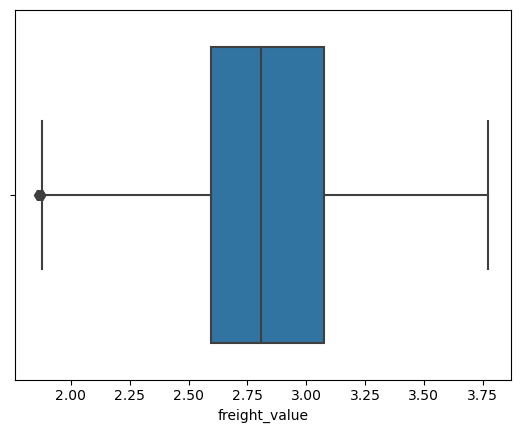

In [83]:
sns.boxplot(x='freight_value',data=df)

In [84]:
# Detecting and handling outliers in product_name_length
q1,q2,q3 = np.percentile(df['product_name_lenght'],[25,50,75])
print("q1,q2,q3 is :",q1,q2,q3)
IQR = q3-q1
print("IQR is :" ,IQR)
lower_limit = q1-(1.5*IQR)
upper_limit = q3+(1.5*IQR)
print("lower = " ,lower_limit)
print("upper = " ,upper_limit)
outlier = []
for i in df['product_name_lenght']:
    if ((i>upper_limit) or (i<lower_limit)):
        outlier.append(i)
print(len(outlier))

q1,q2,q3 is : 43.0 52.0 57.0
IQR is : 14.0
lower =  22.0
upper =  78.0
1097


In [85]:
df['product_name_lenght']=np.where(df['product_name_lenght']>upper_limit,upper_limit,df['product_name_lenght'])
df['product_name_lenght']=np.where(df['product_name_lenght']<lower_limit,upper_limit,df['product_name_lenght'])

<AxesSubplot:xlabel='product_name_lenght'>

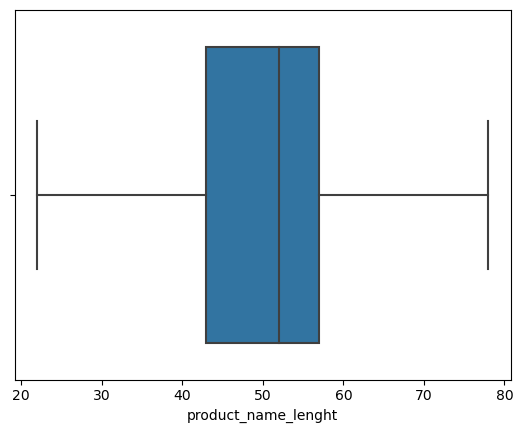

In [86]:
sns.boxplot(x='product_name_lenght',data=df)

In [87]:
# Detecting and handling outliers in  product_description_lenght 
q1,q2,q3 = np.percentile(df['product_description_lenght'],[25,50,75])
print("q1,q2,q3 is :",q1,q2,q3)
IQR = q3-q1
print("IQR is :" ,IQR)
lower_limit = q1-(1.5*IQR)
upper_limit = q3+(1.5*IQR)
print("lower = " ,lower_limit)
print("upper = " ,upper_limit)
outlier = []
for i in df['product_description_lenght']:
    if ((i>upper_limit) or (i<lower_limit)):
        outlier.append(i)
print(len(outlier))

q1,q2,q3 is : 348.0 601.0 977.0
IQR is : 629.0
lower =  -595.5
upper =  1920.5
6474


In [88]:
df['product_description_lenght']=np.where(df['product_description_lenght']>upper_limit,upper_limit,df['product_description_lenght'])
df['product_description_lenght']=np.where(df['product_description_lenght']<lower_limit,upper_limit,df['product_description_lenght'])

<AxesSubplot:xlabel='product_description_lenght'>

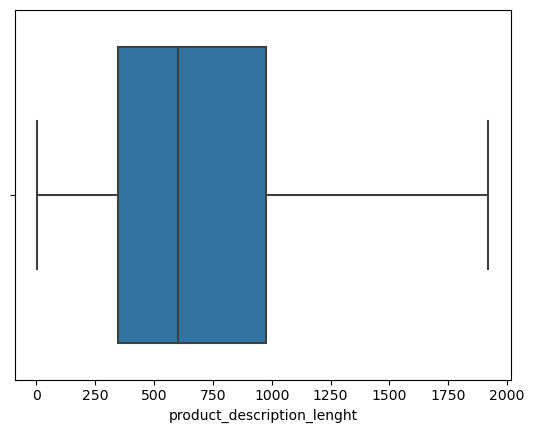

In [89]:
sns.boxplot(x='product_description_lenght',data=df)

In [90]:
# Detecting and handling outliers in product_photos_qty  
q1,q2,q3 = np.percentile(df['product_photos_qty'],[25,50,75])
print("q1,q2,q3 is :",q1,q2,q3)
IQR = q3-q1
print("IQR is :" ,IQR)
lower_limit = q1-(1.5*IQR)
upper_limit = q3+(1.5*IQR)
print("lower = " ,lower_limit)
print("upper = " ,upper_limit)
outlier = []
for i in df['product_photos_qty']:
    if ((i>upper_limit) or (i<lower_limit)):
        outlier.append(i)
print(len(outlier))

q1,q2,q3 is : 1.0 2.0 3.0
IQR is : 2.0
lower =  -2.0
upper =  6.0
2994


In [91]:
df['product_photos_qty']=np.where(df['product_photos_qty']>upper_limit,upper_limit,df['product_photos_qty'])
df['product_photos_qty']=np.where(df['product_photos_qty']<lower_limit,upper_limit,df['product_photos_qty'])

<AxesSubplot:xlabel='product_photos_qty'>

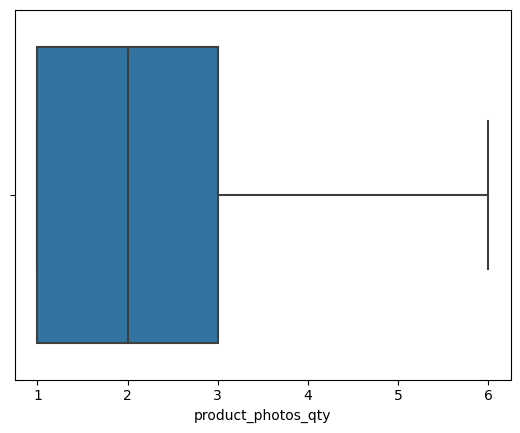

In [92]:
sns.boxplot(x='product_photos_qty',data=df)

In [93]:
# Detecting and handling outliers in product_weight_g   
q1,q2,q3 = np.percentile(df['product_weight_g'],[25,50,75])
print("q1,q2,q3 is :",q1,q2,q3)
IQR = q3-q1
print("IQR is :" ,IQR)
lower_limit = q1-(1.5*IQR)
upper_limit = q3+(1.5*IQR)
print("lower = " ,lower_limit)
print("upper = " ,upper_limit)
outlier = []
for i in df['product_weight_g']:
    if ((i>upper_limit) or (i<lower_limit)):
        outlier.append(i)
print(len(outlier))

q1,q2,q3 is : 300.0 700.0 1800.0
IQR is : 1500.0
lower =  -1950.0
upper =  4050.0
14716


In [94]:
df['product_weight_g']=np.where(df['product_weight_g']>upper_limit,upper_limit,df['product_weight_g'])
df['product_weight_g']=np.where(df['product_weight_g']<lower_limit,upper_limit,df['product_weight_g'])

<AxesSubplot:xlabel='product_weight_g'>

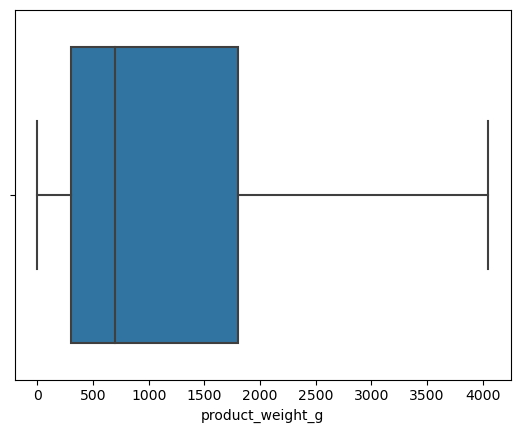

In [95]:
sns.boxplot(x='product_weight_g',data=df)

In [96]:
# Detecting and handling outliers in product_length_cm   
q1,q2,q3 = np.percentile(df['product_length_cm'],[25,50,75])
print("q1,q2,q3 is :",q1,q2,q3)
IQR = q3-q1
print("IQR is :" ,IQR)
lower_limit = q1-(1.5*IQR)
upper_limit = q3+(1.5*IQR)
print("lower = " ,lower_limit)
print("upper = " ,upper_limit)
outlier = []
for i in df['product_length_cm']:
    if ((i>upper_limit) or (i<lower_limit)):
        outlier.append(i)
print(len(outlier))

q1,q2,q3 is : 18.0 25.0 38.0
IQR is : 20.0
lower =  -12.0
upper =  68.0
3313


In [97]:
df['product_length_cm']=np.where(df['product_length_cm']>upper_limit,upper_limit,df['product_length_cm'])
df['product_length_cm']=np.where(df['product_length_cm']<lower_limit,upper_limit,df['product_length_cm'])

<AxesSubplot:xlabel='product_length_cm'>

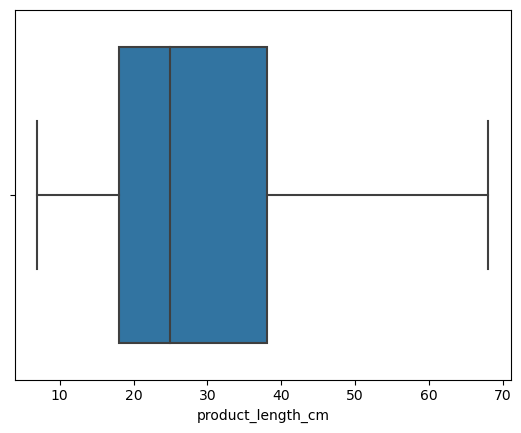

In [98]:
sns.boxplot(x='product_length_cm',data=df)

In [99]:
# Detecting and handling outliers in product_height_cm    
q1,q2,q3 = np.percentile(df['product_height_cm'],[25,50,75])
print("q1,q2,q3 is :",q1,q2,q3)
IQR = q3-q1
print("IQR is :" ,IQR)
lower_limit = q1-(1.5*IQR)
upper_limit = q3+(1.5*IQR)
print("lower = " ,lower_limit)
print("upper = " ,upper_limit)
outlier = []
for i in df['product_height_cm']:
    if ((i>upper_limit) or (i<lower_limit)):
        outlier.append(i)
print(len(outlier))

q1,q2,q3 is : 8.0 13.0 20.0
IQR is : 12.0
lower =  -10.0
upper =  38.0
6937


In [100]:
df['product_height_cm']=np.where(df['product_height_cm']>upper_limit,upper_limit,df['product_height_cm'])
df['product_height_cm']=np.where(df['product_height_cm']<lower_limit,upper_limit,df['product_height_cm'])

<AxesSubplot:xlabel='product_height_cm'>

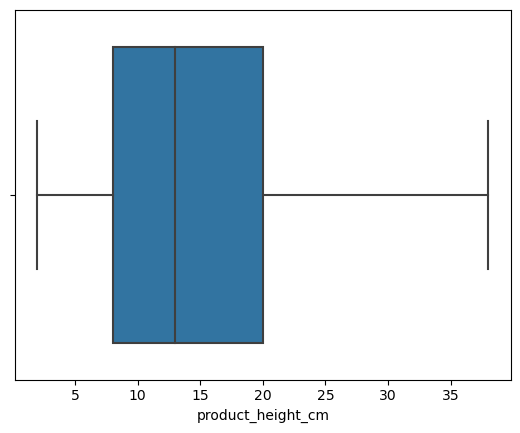

In [101]:
sns.boxplot(x='product_height_cm',data=df)

In [102]:
# Detecting and handling outliers inproduct_width_cm   
q1,q2,q3 = np.percentile(df['product_width_cm'],[25,50,75])
print("q1,q2,q3 is :",q1,q2,q3)
IQR = q3-q1
print("IQR is :" ,IQR)
lower_limit = q1-(1.5*IQR)
upper_limit = q3+(1.5*IQR)
print("lower = " ,lower_limit)
print("upper = " ,upper_limit)
outlier = []
for i in df['product_width_cm']:
    if ((i>upper_limit) or (i<lower_limit)):
        outlier.append(i)
print(len(outlier))

q1,q2,q3 is : 15.0 20.0 30.0
IQR is : 15.0
lower =  -7.5
upper =  52.5
2439


In [103]:
df['product_width_cm']=np.where(df['product_width_cm']>upper_limit,upper_limit,df['product_width_cm'])
df['product_width_cm']=np.where(df['product_width_cm']<lower_limit,upper_limit,df['product_width_cm'])

<AxesSubplot:xlabel='product_width_cm'>

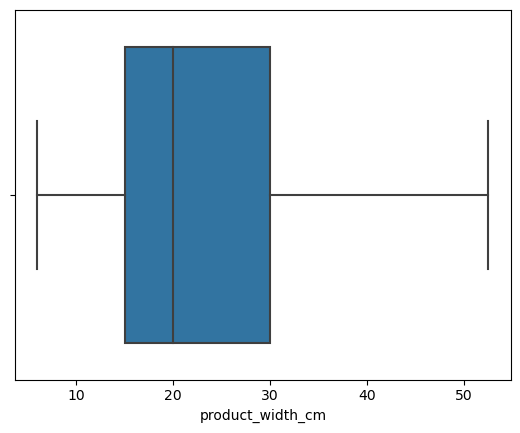

In [104]:
sns.boxplot(x='product_width_cm',data=df)

In [105]:
# Detecting and handling outliers in payment_sequential   
q1,q2,q3 = np.percentile(df['payment_sequential'],[25,50,75])
print("q1,q2,q3 is :",q1,q2,q3)
IQR = q3-q1
print("IQR is :" ,IQR)
lower_limit = q1-(1.5*IQR)
upper_limit = q3+(1.5*IQR)
print("lower = " ,lower_limit)
print("upper = " ,upper_limit)
outlier = []
for i in df['payment_sequential']:
    if ((i>upper_limit) or (i<lower_limit)):
        outlier.append(i)
print(len(outlier))

q1,q2,q3 is : 1.0 1.0 1.0
IQR is : 0.0
lower =  1.0
upper =  1.0
4556


In [106]:
# Detecting and handling outliers in payment_installments'  
q1,q2,q3 = np.percentile(df['payment_installments'],[25,50,75])
print("q1,q2,q3 is :",q1,q2,q3)
IQR = q3-q1
print("IQR is :" ,IQR)
lower_limit = q1-(1.5*IQR)
upper_limit = q3+(1.5*IQR)
print("lower = " ,lower_limit)
print("upper = " ,upper_limit)
outlier = []
for i in df['payment_installments']:
    if ((i>upper_limit) or (i<lower_limit)):
        outlier.append(i)
print(len(outlier))

q1,q2,q3 is : 1.0 1.0 4.0
IQR is : 3.0
lower =  -3.5
upper =  8.5
6604


In [107]:
df['payment_installments']=np.where(df['payment_installments']>upper_limit,upper_limit,df['payment_installments'])
df['payment_installments']=np.where(df['payment_installments']<lower_limit,upper_limit,df['payment_installments'])

<AxesSubplot:xlabel='payment_installments'>

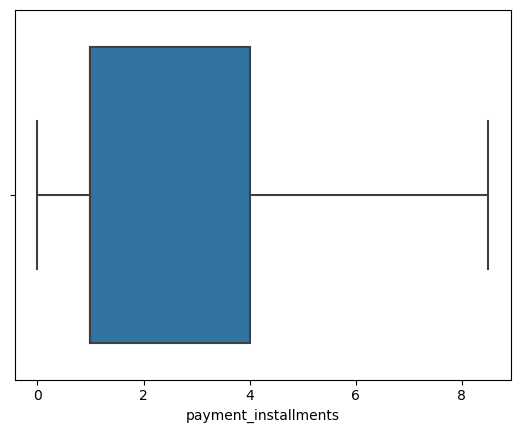

In [108]:
sns.boxplot(x='payment_installments',data=df)

In [109]:
# Detecting and handling outliers in payment_value'  
q1,q2,q3 = np.percentile(df['payment_value'],[25,50,75])
print("q1,q2,q3 is :",q1,q2,q3)
IQR = q3-q1
print("IQR is :" ,IQR)
lower_limit = q1-(1.5*IQR)
upper_limit = q3+(1.5*IQR)
print("lower = " ,lower_limit)
print("upper = " ,upper_limit)
outlier = []
for i in df['payment_value']:
    if ((i>upper_limit) or (i<lower_limit)):
        outlier.append(i)
print(len(outlier))

q1,q2,q3 is : 57.68 102.04 175.64
IQR is : 117.95999999999998
lower =  -119.25999999999996
upper =  352.5799999999999
7970


In [110]:
df['payment_value']=np.where(df['payment_value']>upper_limit,upper_limit,df['payment_value'])
df['payment_value']=np.where(df['payment_value']<lower_limit,upper_limit,df['payment_value'])

<AxesSubplot:xlabel='payment_value'>

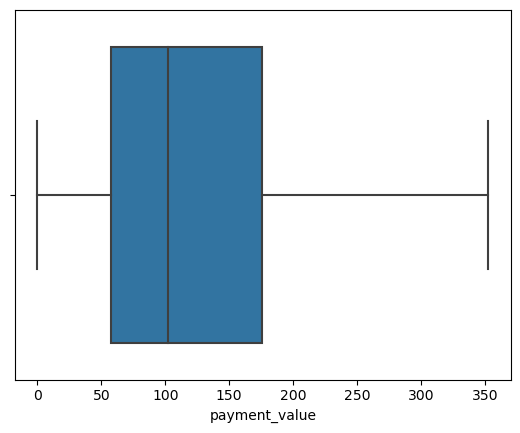

In [111]:
sns.boxplot(x='payment_value',data=df)

In [112]:
df.describe()

,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,Year,ratings
count,104127.000000,104127.000000,104127.000000,104127.000000,104127.000000,104127.000000,104127.000000,104127.000000,104127.000000,104127.000000,104127.000000,104127.000000,104127.000000,104127.000000
mean,4.348426,2.848439,49.583701,735.913759,2.175267,1305.787241,29.627705,15.318659,22.804974,1.091004,2.786684,130.870269,2017.539985,0.779538
std,0.904693,0.448693,9.829156,503.029218,1.527238,1349.807486,14.287463,9.892040,10.702446,0.672571,2.433651,96.071886,0.504149,0.414560
min,1.832581,1.857859,22.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000,2016.000000,0.000000
25%,3.706965,2.597491,43.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,57.680000,2017.000000,1.000000
50%,4.356709,2.807594,52.000000,601.000000,2.000000,700.000000,25.000000,13.000000,20.000000,1.000000,1.000000,102.040000,2018.000000,1.000000
75%,4.934474,3.077773,57.000000,977.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,175.640000,2018.000000,1.000000
max,6.793857,3.773869,78.000000,1920.500000,6.000000,4050.000000,68.000000,38.000000,52.500000,26.000000,8.500000,352.580000,2018.000000,1.000000


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104127 entries, 0 to 117327
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   shipping_limit_date            104127 non-null  datetime64[ns]
 1   price                          104127 non-null  float64       
 2   freight_value                  104127 non-null  float64       
 3   product_category_name          104127 non-null  object        
 4   product_name_lenght            104127 non-null  float64       
 5   product_description_lenght     104127 non-null  float64       
 6   product_photos_qty             104127 non-null  float64       
 7   product_weight_g               104127 non-null  float64       
 8   product_length_cm              104127 non-null  float64       
 9   product_height_cm              104127 non-null  float64       
 10  product_width_cm               104127 non-null  float64       
 11  

# Feature Engineering

Feature engineering plays very crucial role, as the given features are not much useful to achieve the goal we have created some more features as well, which could have an impact on customer’s satisfaction.

# Time based features:
    
The most important thing in e-commerce is delivery time. If the product is not delivered on promised time, then there is a high chance that the customer is not satisfied. Also if the promised time itself is too long, then also the customer could be unhappy. If the customer gets the product earlier than the estimated time, then there is chance that the customer giving review score high. So, based on this research, we are creating some features which are based on the timestamps given in the data frame.

Let us define time based features:

1. estimated_time = order_estimated_delivery_date - order_purchase_timestamp
2. actual_time = order_delivered_customer_date - order_purchase_timestamp
3. diff_actual_estimated = order_delivered_customer_date - order_estimated_delivery_date

In [114]:
#Time of estimated delivery
df['estimated_time'] = (df['order_estimated_delivery_date'] - df['order_purchase_timestamp']).apply(lambda x: x.total_seconds()/3600)
df['actual_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).apply(lambda x: x.total_seconds()/3600)
df['diff_actual_estimated'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).apply(lambda x: x.total_seconds()/3600)
df['diff_approval_shipping'] = (df['shipping_limit_date'] - df['order_approved_at']).apply(lambda x: x.total_seconds()/3600)
df['shipping_time'] = (df['order_delivered_carrier_date'] - df['shipping_limit_date']).apply(lambda x: x.total_seconds()/3600)

In [115]:
df=df.drop(['order_delivered_customer_date'],axis=1)
df=df.drop(['order_purchase_timestamp'],axis=1)
df=df.drop(['order_estimated_delivery_date'],axis=1)
df=df.drop(['shipping_limit_date'],axis=1)
df=df.drop(['order_approved_at'],axis=1)
df=df.drop(['order_delivered_carrier_date'],axis=1)
df=df.drop(['payment_sequential'],axis=1)
df=df.drop(['Year'],axis=1)
df=df.drop(['Day'],axis=1)
df.head()

,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,order_status,payment_type,payment_installments,payment_value,customer_city,customer_state,ratings,estimated_time,actual_time,diff_actual_estimated,diff_approval_shipping,shipping_time
0,4.075841,2.587012,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,volta redonda,SP,delivered,credit_card,2.0,72.19,campos dos goytacazes,RJ,1,375.016667,182.733333,-192.283333,144.000000,8.816667
1,4.023564,2.888147,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,volta redonda,SP,delivered,boleto,1.0,73.86,jatai,GO,1,660.133333,368.783333,-291.350000,144.000000,9.266667
2,4.172848,2.908539,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,volta redonda,SP,delivered,credit_card,2.0,83.23,belo horizonte,MG,1,469.583333,416.150000,-53.433333,118.416667,3.150000
3,4.075841,2.783158,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,volta redonda,SP,delivered,credit_card,3.0,75.07,sao jose dos pinhais,PR,1,557.366667,194.800000,-362.566667,144.000000,-119.800000
4,4.075841,2.587012,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,volta redonda,SP,delivered,credit_card,4.0,72.19,conselheiro lafaiete,MG,1,506.200000,334.266667,-171.933333,144.000000,-122.366667


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104127 entries, 0 to 117327
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   price                       104127 non-null  float64
 1   freight_value               104127 non-null  float64
 2   product_category_name       104127 non-null  object 
 3   product_name_lenght         104127 non-null  float64
 4   product_description_lenght  104127 non-null  float64
 5   product_photos_qty          104127 non-null  float64
 6   product_weight_g            104127 non-null  float64
 7   product_length_cm           104127 non-null  float64
 8   product_height_cm           104127 non-null  float64
 9   product_width_cm            104127 non-null  float64
 10  seller_city                 104127 non-null  object 
 11  seller_state                104127 non-null  object 
 12  order_status                104127 non-null  object 
 13  payment_type  

# Product size features:

Let's define the product size features by applying the following formula:

[size = (length * breadth * height)]

In [117]:
df['product_size'] = (df['product_length_cm']*df['product_width_cm']*df['product_height_cm'])

In [118]:
df=df.drop(['product_length_cm'],axis=1)
df=df.drop(['product_width_cm'],axis=1)
df=df.drop(['product_height_cm'],axis=1)

In [119]:
df.head(10)

,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,seller_city,seller_state,order_status,payment_type,payment_installments,payment_value,customer_city,customer_state,ratings,estimated_time,actual_time,diff_actual_estimated,diff_approval_shipping,shipping_time,product_size
0,4.075841,2.587012,cool_stuff,58.0,598.0,4.0,650.0,volta redonda,SP,delivered,credit_card,2.0,72.19,campos dos goytacazes,RJ,1,375.016667,182.733333,-192.283333,144.000000,8.816667,3528.0
1,4.023564,2.888147,cool_stuff,58.0,598.0,4.0,650.0,volta redonda,SP,delivered,boleto,1.0,73.86,jatai,GO,1,660.133333,368.783333,-291.350000,144.000000,9.266667,3528.0
2,4.172848,2.908539,cool_stuff,58.0,598.0,4.0,650.0,volta redonda,SP,delivered,credit_card,2.0,83.23,belo horizonte,MG,1,469.583333,416.150000,-53.433333,118.416667,3.150000,3528.0
3,4.075841,2.783158,cool_stuff,58.0,598.0,4.0,650.0,volta redonda,SP,delivered,credit_card,3.0,75.07,sao jose dos pinhais,PR,1,557.366667,194.800000,-362.566667,144.000000,-119.800000,3528.0
4,4.075841,2.587012,cool_stuff,58.0,598.0,4.0,650.0,volta redonda,SP,delivered,credit_card,4.0,72.19,conselheiro lafaiete,MG,1,506.200000,334.266667,-171.933333,144.000000,-122.366667,3528.0
5,4.023564,3.293241,cool_stuff,58.0,598.0,4.0,650.0,volta redonda,SP,delivered,credit_card,1.0,82.83,dom macedo costa,BA,1,656.816667,845.133333,188.316667,144.000000,-20.850000,3528.0
6,4.172848,3.650658,cool_stuff,58.0,598.0,4.0,650.0,volta redonda,SP,delivered,boleto,1.0,103.40,belo campo,BA,1,579.000000,240.950000,-338.050000,144.000000,-129.333333,3528.0
7,4.075841,2.897016,cool_stuff,58.0,598.0,4.0,650.0,volta redonda,SP,delivered,boleto,1.0,153.75,rio verde,GO,1,751.016667,217.233333,-533.783333,144.000000,-83.750000,3528.0
8,4.075841,2.880882,cool_stuff,54.0,599.0,6.0,530.0,volta redonda,SP,delivered,boleto,1.0,153.75,rio verde,GO,1,751.016667,217.233333,-533.783333,144.000000,-83.750000,3780.0
9,4.023564,3.575431,cool_stuff,58.0,598.0,4.0,650.0,volta redonda,SP,delivered,voucher,1.0,20.00,paulista,PE,0,731.633333,505.500000,-226.133333,96.000000,-49.366667,3528.0


In [120]:
df.shape

(104127, 22)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104127 entries, 0 to 117327
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   price                       104127 non-null  float64
 1   freight_value               104127 non-null  float64
 2   product_category_name       104127 non-null  object 
 3   product_name_lenght         104127 non-null  float64
 4   product_description_lenght  104127 non-null  float64
 5   product_photos_qty          104127 non-null  float64
 6   product_weight_g            104127 non-null  float64
 7   seller_city                 104127 non-null  object 
 8   seller_state                104127 non-null  object 
 9   order_status                104127 non-null  object 
 10  payment_type                104127 non-null  object 
 11  payment_installments        104127 non-null  float64
 12  payment_value               104127 non-null  float64
 13  customer_city 

<AxesSubplot:>

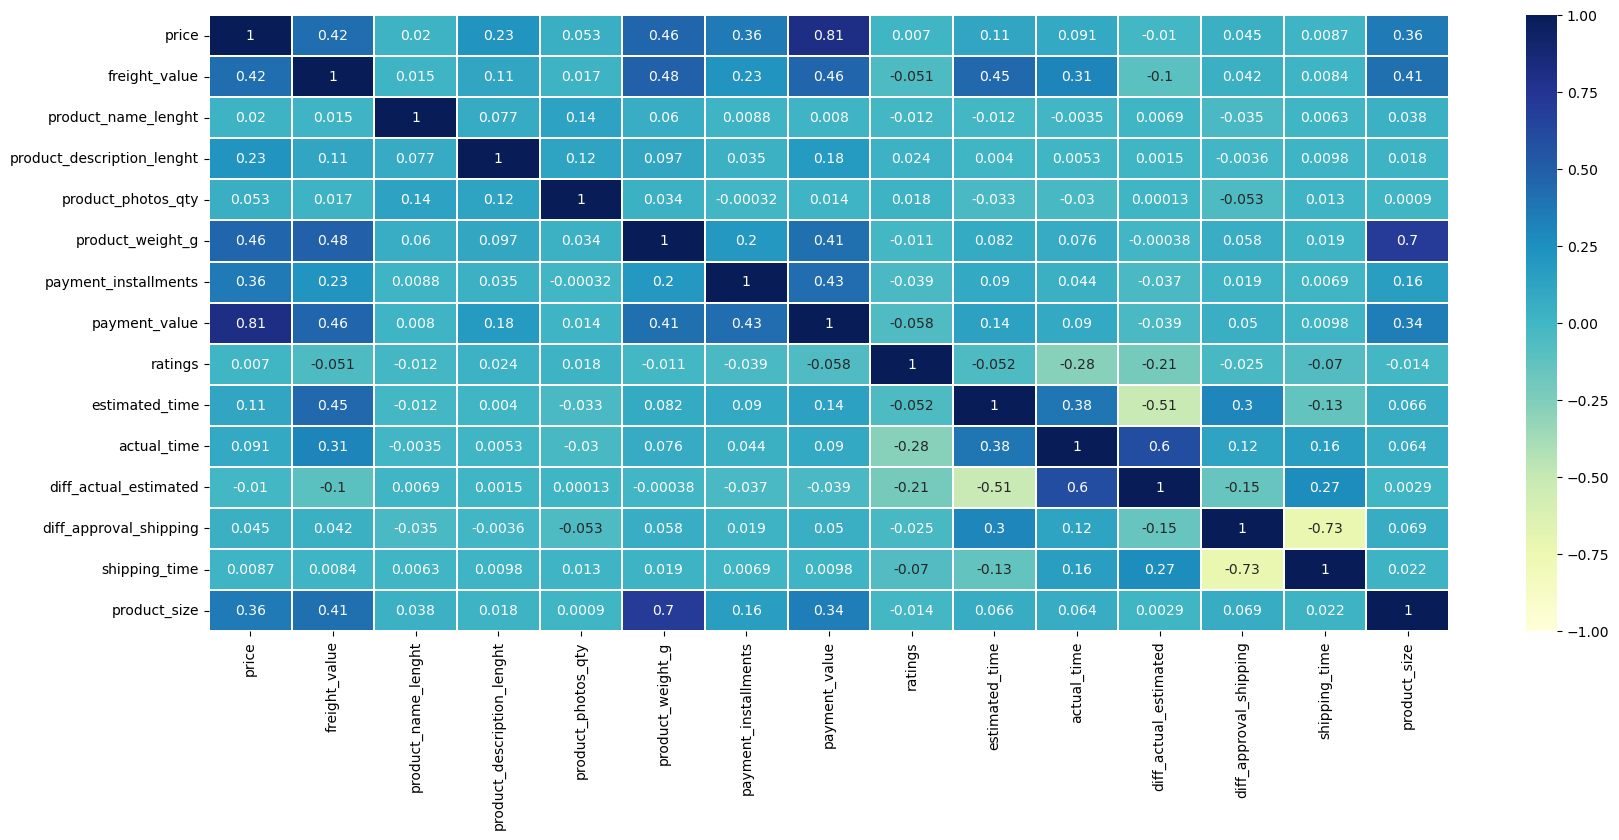

In [122]:

corrmatrix=df.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-1,vmax=1,annot=True,linewidth=.2,cmap='YlGnBu')

# Encoding

In [123]:
categorical_features=[feature for feature in df.columns if df[feature].dtype =='O']
categorical_features

['product_category_name',
 'seller_city',
 'seller_state',
 'order_status',
 'payment_type',
 'customer_city',
 'customer_state']

In [124]:
#we have to convert this categorical features

In [125]:
#checking for unique values in each categorical column

In [126]:
for column in categorical_features:
    no_of_unique = len(df[column].unique())
    print( column ,':' ,no_of_unique)    

product_category_name : 73
seller_city : 594
seller_state : 22
order_status : 2
payment_type : 4
customer_city : 4083
customer_state : 27


In [127]:
df['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card'], dtype=object)

In [128]:
#Label encoding
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [129]:
#df['product_category_name']='cat_name'
cat_name=label_encoder.fit_transform(df['product_category_name'])
df['product_category_name']=cat_name

In [130]:
df.head()

,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,seller_city,seller_state,order_status,payment_type,payment_installments,payment_value,customer_city,customer_state,ratings,estimated_time,actual_time,diff_actual_estimated,diff_approval_shipping,shipping_time,product_size
0,4.075841,2.587012,26,58.0,598.0,4.0,650.0,volta redonda,SP,delivered,credit_card,2.0,72.19,campos dos goytacazes,RJ,1,375.016667,182.733333,-192.283333,144.000000,8.816667,3528.0
1,4.023564,2.888147,26,58.0,598.0,4.0,650.0,volta redonda,SP,delivered,boleto,1.0,73.86,jatai,GO,1,660.133333,368.783333,-291.350000,144.000000,9.266667,3528.0
2,4.172848,2.908539,26,58.0,598.0,4.0,650.0,volta redonda,SP,delivered,credit_card,2.0,83.23,belo horizonte,MG,1,469.583333,416.150000,-53.433333,118.416667,3.150000,3528.0
3,4.075841,2.783158,26,58.0,598.0,4.0,650.0,volta redonda,SP,delivered,credit_card,3.0,75.07,sao jose dos pinhais,PR,1,557.366667,194.800000,-362.566667,144.000000,-119.800000,3528.0
4,4.075841,2.587012,26,58.0,598.0,4.0,650.0,volta redonda,SP,delivered,credit_card,4.0,72.19,conselheiro lafaiete,MG,1,506.200000,334.266667,-171.933333,144.000000,-122.366667,3528.0


In [131]:
for column in categorical_features:
    df[column]=label_encoder.fit_transform(df[column])
df.head() 

,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,seller_city,seller_state,order_status,payment_type,payment_installments,payment_value,customer_city,customer_state,ratings,estimated_time,actual_time,diff_actual_estimated,diff_approval_shipping,shipping_time,product_size
0,4.075841,2.587012,26,58.0,598.0,4.0,650.0,589,21,1,1,2.0,72.19,732,18,1,375.016667,182.733333,-192.283333,144.000000,8.816667,3528.0
1,4.023564,2.888147,26,58.0,598.0,4.0,650.0,589,21,1,0,1.0,73.86,1933,8,1,660.133333,368.783333,-291.350000,144.000000,9.266667,3528.0
2,4.172848,2.908539,26,58.0,598.0,4.0,650.0,589,21,1,1,2.0,83.23,449,10,1,469.583333,416.150000,-53.433333,118.416667,3.150000,3528.0
3,4.075841,2.783158,26,58.0,598.0,4.0,650.0,589,21,1,1,3.0,75.07,3521,17,1,557.366667,194.800000,-362.566667,144.000000,-119.800000,3528.0
4,4.075841,2.587012,26,58.0,598.0,4.0,650.0,589,21,1,1,4.0,72.19,1028,10,1,506.200000,334.266667,-171.933333,144.000000,-122.366667,3528.0


In [132]:
#splitting data into dependent and independent columns
x=df.drop('ratings',axis=1)
y=df['ratings']

## Scaling

In [133]:
#standard scaling
#from sklearn import preprocessing
standadisation=preprocessing.StandardScaler()
x=standadisation.fit_transform(x)
# Coverting to Dataframe
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,1.041270e+05,1.041270e+05,1.041270e+05,1.041270e+05,1.041270e+05,1.041270e+05,1.041270e+05,1.041270e+05,1.041270e+05,1.041270e+05,1.041270e+05,1.041270e+05,1.041270e+05,1.041270e+05,1.041270e+05,1.041270e+05,1.041270e+05,1.041270e+05,1.041270e+05,1.041270e+05,1.041270e+05
mean,2.006660e-15,-5.439163e-15,2.123272e-14,-2.440403e-15,-2.935637e-15,1.648847e-14,3.792064e-15,-3.006087e-15,-2.771529e-14,6.527313e-15,-1.816985e-14,-5.324767e-15,4.594152e-15,-8.227871e-16,-1.822735e-15,-1.532020e-16,-4.510762e-16,1.211119e-17,-2.602481e-15,9.982912e-17,1.345065e-15
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-2.780894e+00,-2.207712e+00,-1.626930e+00,-2.806328e+00,-1.455019e+00,-7.695410e-01,-9.673924e-01,-2.149213e+00,-3.796090e+00,-1.219602e+02,-1.443448e+00,-1.145068e+00,-1.362218e+00,-1.965956e+00,-2.635090e+00,-2.484483e+00,-1.262763e+00,-1.326543e+01,-2.785206e+00,-2.115900e+02,-7.756690e-01
25%,-7.090406e-01,-5.592899e-01,-1.041216e+00,-6.698167e-01,-7.711592e-01,-7.695410e-01,-7.451374e-01,-7.831302e-01,-8.778286e-02,8.199397e-03,1.004536e-01,-7.341611e-01,-7.618318e-01,-9.177511e-01,-9.408177e-01,-6.174541e-01,-6.064352e-01,-4.890363e-01,-4.748196e-01,-3.773938e-01,-6.198467e-01
50%,9.155407e-03,-9.103235e-02,-1.851734e-01,2.458310e-01,-2.682039e-01,-1.147611e-01,-4.487974e-01,3.295165e-01,5.302684e-01,8.199397e-03,1.004536e-01,-7.341611e-01,-3.000920e-01,2.847237e-01,4.710760e-01,-6.355680e-02,-2.422818e-01,-7.130775e-02,-3.051452e-02,2.321326e-02,-4.089452e-01
75%,6.477894e-01,5.111177e-01,8.510888e-01,7.545241e-01,4.792712e-01,5.400187e-01,3.661375e-01,9.600163e-01,5.302684e-01,8.199397e-03,1.004536e-01,4.985604e-01,4.660047e-01,9.785234e-01,8.946440e-01,5.270559e-01,3.237059e-01,4.761445e-01,-3.051452e-02,3.569352e-01,2.736602e-01
max,2.703062e+00,2.062511e+00,1.617022e+00,2.891035e+00,2.354917e+00,2.504358e+00,2.033050e+00,1.516340e+00,5.302684e-01,8.199397e-03,3.188256e+00,2.347643e+00,2.307759e+00,1.437999e+00,1.035833e+00,1.496360e+01,2.071711e+01,1.973068e+01,2.321189e+02,2.435422e+01,7.197397e+00


# Model Selection

In [134]:
#splitting as training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =42,test_size=0.33)

In [135]:
# import necessary libraries and fitting with different models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier

In [136]:
models=  {'RandomForestClassifier':RandomForestClassifier(),
          'LogisticRegression':LogisticRegression(),
          'KNeighborsClassifier':KNeighborsClassifier(),
          #'SVC':SVC(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'BernoulliNB':BernoulliNB(),
          'GaussianNB':GaussianNB(),
          'XGBClassifier':XGBClassifier()}

for name,model in models.items():
    model.fit(x_train,y_train)
    print(name+'  trained')

RandomForestClassifier  trained
LogisticRegression  trained
KNeighborsClassifier  trained
DecisionTreeClassifier  trained
BernoulliNB  trained
GaussianNB  trained
XGBClassifier  trained


In [137]:
# Evaluate the performance
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

In [138]:
model_test_acc=[]
model_test_recall_score=[]
model_test_f1_score=[]
model_test_precision_score=[]
model_conf_mat=[]
#checking the scores of classifiers
for name,model in models.items():
    y_pred=model.predict(x_test)
    model_test_acc.append(accuracy_score(y_test,y_pred))
    model_test_recall_score.append(recall_score(y_test,y_pred))
    model_test_f1_score.append(f1_score(y_test,y_pred))
    model_test_precision_score.append(precision_score(y_test,y_pred))
    model_conf_mat.append(confusion_matrix(y_test,y_pred))
    
confusion_matrix1={'Random Forest':model_conf_mat[0],
                  'Logistic regression':model_conf_mat[1],
                  'KNN':model_conf_mat[2],
                  #'SVC':model_conf_mat[3],
                  'DecisionTree':model_conf_mat[3],
                  'BernolliNB':model_conf_mat[4],
                  'GaussianNB':model_conf_mat[5],
                  'XGBClassifier':model_conf_mat[6]}
confusion_matrix1

{'Random Forest': array([[ 2125,  5467],
        [  501, 26269]], dtype=int64),
 'Logistic regression': array([[ 1250,  6342],
        [  435, 26335]], dtype=int64),
 'KNN': array([[ 1825,  5767],
        [ 1427, 25343]], dtype=int64),
 'DecisionTree': array([[ 3098,  4494],
        [ 5166, 21604]], dtype=int64),
 'BernolliNB': array([[  351,  7241],
        [  451, 26319]], dtype=int64),
 'GaussianNB': array([[ 1657,  5935],
        [  981, 25789]], dtype=int64),
 'XGBClassifier': array([[ 2048,  5544],
        [  751, 26019]], dtype=int64)}

In [139]:
Models = ['Random Forest','Logistic regression','KNN','DecisionTree','BernolliNB','GaussianNB','XGBClassifier']
model_performance = pd.DataFrame({
    'Model':Models,
    'Accuracy_score':model_test_acc,
    'F1_score':model_test_f1_score,
    'Recall_score':model_test_recall_score,
    'Precision_score':model_test_precision_score
    })
model_performance

,Model,Accuracy_score,F1_score,Recall_score,Precision_score
0,Random Forest,0.826320,0.897993,0.981285,0.827735
1,Logistic regression,0.802776,0.885999,0.983750,0.805919
2,KNN,0.790641,0.875708,0.946694,0.814626
3,DecisionTree,0.718876,0.817281,0.807023,0.827803
4,BernolliNB,0.776148,0.872501,0.983153,0.784237
5,GaussianNB,0.798731,0.881766,0.963355,0.812918
6,XGBClassifier,0.816803,0.892085,0.971946,0.824351


In [140]:
#Random forest is giving good accuracy ,precision and recall.eventhough we are performing different sampling techniques

### Over sampling

In [141]:
#installing imbalanced-learn module
#pip install imbalanced-learn
#conda install -c conda-forge imbalanced-learn

In [142]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(random_state=0)
x_train_os,y_train_os = os.fit_resample(x_train,y_train)
from collections import Counter
print('original dataset shape {}'.format(sorted(Counter(y_train).items())))
print('Resampled dataset shape {}'.format(sorted(Counter(y_train_os).items())))

original dataset shape [(0, 15364), (1, 54401)]
Resampled dataset shape [(0, 54401), (1, 54401)]


In [143]:
models=  {'RandomForestClassifier':RandomForestClassifier(),
          'LogisticRegression':LogisticRegression(),
          'KNeighborsClassifier':KNeighborsClassifier(),
          #'SVC':SVC(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'BernoulliNB':BernoulliNB(),
          'GaussianNB':GaussianNB(),
          'XGBClassifier':XGBClassifier()}

for name,model in models.items():
    model.fit(x_train_os,y_train_os)
    print(name+'  trained')

RandomForestClassifier  trained
LogisticRegression  trained
KNeighborsClassifier  trained
DecisionTreeClassifier  trained
BernoulliNB  trained
GaussianNB  trained
XGBClassifier  trained


In [144]:
model_test_acc=[]
model_test_recall_score=[]
model_test_f1_score=[]
model_test_precision_score=[]
model_conf_mat=[]
#checking the scores of classifiers
for name,model in models.items():
    y_pred=model.predict(x_test)
    model_test_acc.append(accuracy_score(y_test,y_pred))
    model_test_recall_score.append(recall_score(y_test,y_pred))
    model_test_f1_score.append(f1_score(y_test,y_pred))
    model_test_precision_score.append(precision_score(y_test,y_pred))
    model_conf_mat.append(confusion_matrix(y_test,y_pred))

confusion_matrix2={'Random Forest':model_conf_mat[0],
                  'Logistic regression':model_conf_mat[1],
                  'KNN':model_conf_mat[2],
                  #'SVC':model_conf_mat[3],
                  'DecisionTree':model_conf_mat[3],
                  'BernolliNB':model_conf_mat[4],
                  'GaussianNB':model_conf_mat[5],
                  'XGBClassifier':model_conf_mat[6]}
confusion_matrix2

{'Random Forest': array([[ 2452,  5140],
        [  861, 25909]], dtype=int64),
 'Logistic regression': array([[ 4097,  3495],
        [ 7408, 19362]], dtype=int64),
 'KNN': array([[ 4072,  3520],
        [ 8833, 17937]], dtype=int64),
 'DecisionTree': array([[ 2956,  4636],
        [ 4823, 21947]], dtype=int64),
 'BernolliNB': array([[ 4289,  3303],
        [ 9747, 17023]], dtype=int64),
 'GaussianNB': array([[ 2439,  5153],
        [ 2984, 23786]], dtype=int64),
 'XGBClassifier': array([[ 3869,  3723],
        [ 5145, 21625]], dtype=int64)}

In [145]:
Models = ['Random Forest','Logistic regression','KNN','DecisionTree','BernolliNB','GaussianNB','XGBClassifier']
model_performance = pd.DataFrame({
    'Model':Models,
    'Accuracy_score':model_test_acc,
    'F1_score':model_test_f1_score,
    'Recall_score':model_test_recall_score,
    'Precision_score':model_test_precision_score
    })
model_performance

,Model,Accuracy_score,F1_score,Recall_score,Precision_score
0,Random Forest,0.825359,0.896211,0.967837,0.834455
1,Logistic regression,0.682702,0.780301,0.723272,0.847093
2,KNN,0.640504,0.743857,0.670041,0.835951
3,DecisionTree,0.724725,0.822709,0.819836,0.825603
4,BernolliNB,0.620220,0.722906,0.635898,0.837499
5,GaussianNB,0.763198,0.853937,0.888532,0.821936
6,XGBClassifier,0.741924,0.829848,0.807807,0.853125


### SMOTETomek

In [146]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state=0)
x_train_sm,y_train_sm = sm.fit_resample(x_train,y_train)
from collections import Counter
print('original dataset shape {}'.format(sorted(Counter(y_train).items())))
print('Resampled dataset shape {}'.format(sorted(Counter(y_train_sm).items())))

original dataset shape [(0, 15364), (1, 54401)]
Resampled dataset shape [(0, 54044), (1, 54044)]


In [147]:
models=  {'RandomForestClassifier':RandomForestClassifier(),
          'LogisticRegression':LogisticRegression(),
          'KNeighborsClassifier':KNeighborsClassifier(),
          #'SVC':SVC(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'BernoulliNB':BernoulliNB(),
          'GaussianNB':GaussianNB(),
          'XGBClassifier':XGBClassifier()}

for name,model in models.items():
    model.fit(x_train_sm,y_train_sm)
    print(name+'  trained')

RandomForestClassifier  trained
LogisticRegression  trained
KNeighborsClassifier  trained
DecisionTreeClassifier  trained
BernoulliNB  trained
GaussianNB  trained
XGBClassifier  trained


In [148]:
model_test_acc=[]
model_test_recall_score=[]
model_test_f1_score=[]
model_test_precision_score=[]
model_conf_mat=[]
#checking the scores of classifiers
for name,model in models.items():
    y_pred=model.predict(x_test)
    model_test_acc.append(accuracy_score(y_test,y_pred))
    model_test_recall_score.append(recall_score(y_test,y_pred))
    model_test_f1_score.append(f1_score(y_test,y_pred))
    model_test_precision_score.append(precision_score(y_test,y_pred))
    model_conf_mat.append(confusion_matrix(y_test,y_pred))
confusion_matrix3={'Random Forest':model_conf_mat[0],
                  'Logistic regression':model_conf_mat[1],
                  'KNN':model_conf_mat[2],
                  #'SVC':model_conf_mat[3],
                  'DecisionTree':model_conf_mat[3],
                  'BernolliNB':model_conf_mat[4],
                  'GaussianNB':model_conf_mat[5],
                  'XGBClassifier':model_conf_mat[6],
                 }
confusion_matrix3

{'Random Forest': array([[ 2545,  5047],
        [ 1257, 25513]], dtype=int64),
 'Logistic regression': array([[ 4136,  3456],
        [ 7544, 19226]], dtype=int64),
 'KNN': array([[ 4307,  3285],
        [ 9483, 17287]], dtype=int64),
 'DecisionTree': array([[ 3373,  4219],
        [ 6066, 20704]], dtype=int64),
 'BernolliNB': array([[ 4231,  3361],
        [ 9482, 17288]], dtype=int64),
 'GaussianNB': array([[ 2513,  5079],
        [ 3180, 23590]], dtype=int64),
 'XGBClassifier': array([[ 2238,  5354],
        [ 1248, 25522]], dtype=int64)}

In [149]:
Models = ['Random Forest','Logistic regression','KNN','DecisionTree','BernolliNB','GaussianNB','XGBClassifier']
model_performance = pd.DataFrame({
    'Model':Models,
    'Accuracy_score':model_test_acc,
    'F1_score':model_test_f1_score,
    'Recall_score':model_test_recall_score,
    'Precision_score':model_test_precision_score
    })
model_performance

,Model,Accuracy_score,F1_score,Recall_score,Precision_score
0,Random Forest,0.816542,0.890040,0.953044,0.834849
1,Logistic regression,0.679879,0.777562,0.718192,0.847632
2,KNN,0.628427,0.730303,0.645760,0.840317
3,DecisionTree,0.700687,0.801037,0.773403,0.830719
4,BernolliNB,0.626244,0.729159,0.645798,0.837232
5,GaussianNB,0.759647,0.851025,0.881210,0.822840
6,XGBClassifier,0.807869,0.885473,0.953381,0.826597


### Under sampling

In [150]:
from imblearn.under_sampling import RandomUnderSampler
us = RandomUnderSampler(random_state=0)
x_train_us,y_train_us = us.fit_resample(x_train,y_train)
from collections import Counter
print('original dataset shape {}'.format(sorted(Counter(y).items())))
print('Resampled dataset shape {}'.format(sorted(Counter(y_train_us).items())))

original dataset shape [(0, 22956), (1, 81171)]
Resampled dataset shape [(0, 15364), (1, 15364)]


In [151]:
models=  {'RandomForestClassifier':RandomForestClassifier(),
          'LogisticRegression':LogisticRegression(),
          'KNeighborsClassifier':KNeighborsClassifier(),
          #'SVC':SVC(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'BernoulliNB':BernoulliNB(),
          'GaussianNB':GaussianNB(),
          'XGBClassifier':XGBClassifier()}

for name,model in models.items():
    model.fit(x_train_sm,y_train_sm)
    print(name+'  trained')

RandomForestClassifier  trained
LogisticRegression  trained
KNeighborsClassifier  trained
DecisionTreeClassifier  trained
BernoulliNB  trained
GaussianNB  trained
XGBClassifier  trained


In [152]:
model_test_acc=[]
model_test_recall_score=[]
model_test_f1_score=[]
model_test_precision_score=[]
model_conf_mat=[]
#checking the scores of classifiers
for name,model in models.items():
    y_pred=model.predict(x_test)
    model_test_acc.append(accuracy_score(y_test,y_pred))
    model_test_recall_score.append(recall_score(y_test,y_pred))
    model_test_f1_score.append(f1_score(y_test,y_pred))
    model_test_precision_score.append(precision_score(y_test,y_pred))
    model_conf_mat.append(confusion_matrix(y_test,y_pred))
confusion_matrix4={'Random Forest':model_conf_mat[0],
                  'Logistic regression':model_conf_mat[1],
                  'KNN':model_conf_mat[2],
                  #'SVC':model_conf_mat[3],
                  'DecisionTree':model_conf_mat[3],
                  'BernolliNB':model_conf_mat[4],
                  'GaussianNB':model_conf_mat[5],
                  'XGBClassifier':model_conf_mat[6]
                 }
confusion_matrix4

{'Random Forest': array([[ 2536,  5056],
        [ 1209, 25561]], dtype=int64),
 'Logistic regression': array([[ 4136,  3456],
        [ 7544, 19226]], dtype=int64),
 'KNN': array([[ 4307,  3285],
        [ 9483, 17287]], dtype=int64),
 'DecisionTree': array([[ 3391,  4201],
        [ 6057, 20713]], dtype=int64),
 'BernolliNB': array([[ 4231,  3361],
        [ 9482, 17288]], dtype=int64),
 'GaussianNB': array([[ 2513,  5079],
        [ 3180, 23590]], dtype=int64),
 'XGBClassifier': array([[ 2238,  5354],
        [ 1248, 25522]], dtype=int64)}

In [153]:
Models = ['Random Forest','Logistic regression','KNN','DecisionTree','BernolliNB','GaussianNB','XGBClassifier']
model_performance = pd.DataFrame({
    'Model':Models,
    'Accuracy_score':model_test_acc,
    'F1_score':model_test_f1_score,
    'Recall_score':model_test_recall_score,
    'Precision_score':model_test_precision_score
    })
model_performance

,Model,Accuracy_score,F1_score,Recall_score,Precision_score
0,Random Forest,0.817677,0.890829,0.954838,0.834863
1,Logistic regression,0.679879,0.777562,0.718192,0.847632
2,KNN,0.628427,0.730303,0.645760,0.840317
3,DecisionTree,0.701473,0.801525,0.773739,0.831380
4,BernolliNB,0.626244,0.729159,0.645798,0.837232
5,GaussianNB,0.759647,0.851025,0.881210,0.822840
6,XGBClassifier,0.807869,0.885473,0.953381,0.826597


### Ensemble Techniques

In [154]:
# By default it is Adaboost technique
from imblearn.ensemble import EasyEnsembleClassifier
easy=EasyEnsembleClassifier()
easy.fit(x_train,y_train)
y_pred = easy.predict(x_test)

In [155]:
print('Accuracy Score is : ',accuracy_score(y_test,y_pred))
print('Recall Score is : ', recall_score(y_test,y_pred))
print('Precision Score is : ', precision_score(y_test,y_pred))
print('F1 score is : ', f1_score(y_test,y_pred))

Accuracy Score is :  0.7293812932890984
Recall Score is :  0.7979454613373179
Precision Score is :  0.8459466951803889
F1 score is :  0.8212452663347495


# Hyper Parameter Tuning

In [156]:
from sklearn.model_selection import GridSearchCV
param_grid = { 'bootstrap': [True,False], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [157]:
rf = RandomForestClassifier(random_state = 1)
g_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [158]:
g_search.fit(x_train, y_train);
print(g_search.best_params_)

{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 15}


In [159]:
rf = RandomForestClassifier(n_estimators=15,max_features='auto',max_depth=None)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [160]:
print('Accuracy Score is : ',accuracy_score(y_test,y_pred))
print('Recall Score is : ', recall_score(y_test,y_pred))
print('Precision Score is : ', precision_score(y_test,y_pred))
print('F1 score is : ', f1_score(y_test,y_pred))

Accuracy Score is :  0.8175018916244688
Recall Score is :  0.9658946581994771
Precision Score is :  0.8283517539644402
F1 score is :  0.8918513408640166


In [161]:
#we are choosing random forest classifier
rf = RandomForestClassifier()
model=rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [162]:
print('Accuracy Score is : ',accuracy_score(y_test,y_pred))
print('Recall Score is : ', recall_score(y_test,y_pred))
print('Precision Score is : ', precision_score(y_test,y_pred))
print('F1 score is : ', f1_score(y_test,y_pred))

Accuracy Score is :  0.8262033641813631
Recall Score is :  0.981135599551737
Precision Score is :  0.8277133493003908
F1 score is :  0.8979180198967556


In [163]:
import pickle
pickle.dump(rf,open('model.pkl','wb'))

                                         -- END--